In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import joblib

print("="*70)
print("C2C PROJECT - KMEANS CLUSTERING ON UMAP DATA")
print("="*70)

# ============================================================
# STEP 1: Load UMAP-Reduced Data
# ============================================================
print("\n[Step 1] Loading UMAP-reduced data...")

df_umap = pd.read_csv('Data/umap_dataset.csv')
print(f"✓ Loaded UMAP data: {df_umap.shape}")
print(f"  Samples: {df_umap.shape[0]}")
print(f"  Features (UMAP Components): {df_umap.shape[1]}")
print(df_umap.head())

C2C PROJECT - KMEANS CLUSTERING ON UMAP DATA

[Step 1] Loading UMAP-reduced data...
✓ Loaded UMAP data: (9442, 20)
  Samples: 9442
  Features (UMAP Components): 20
       UMAP1      UMAP2     UMAP3     UMAP4     UMAP5     UMAP6     UMAP7  \
0  12.701968  12.708577  5.084048  3.244598  5.798746  5.880630  5.987408   
1  12.907857  13.231298  5.039801  3.309160  5.704761  5.302773  6.361057   
2  12.738235  12.733431  5.096340  3.201194  5.814496  5.872632  5.986259   
3  12.823728  12.646670  5.163378  2.975456  5.899029  5.690585  6.104073   
4  -4.015690   5.837583  4.976596  6.629065  4.195006  3.055988 -0.941318   

      UMAP8     UMAP9    UMAP10    UMAP11    UMAP12    UMAP13    UMAP14  \
0  7.014525  3.382009  3.433085  6.969922  4.069274  3.607360  2.861838   
1  5.783299  1.569662  3.899474  6.725990  3.779719  3.812328  2.427153   
2  6.976504  3.331601  3.426383  6.994904  4.094792  3.629088  2.817727   
3  6.905349  2.905836  3.443255  6.921977  4.291814  3.572910  2.513206  

In [2]:
# ============================================================
# STEP 2: Determine Optimal Number of Clusters
# ============================================================
print("\n[Step 2] Determining optimal number of clusters...")
print("-" * 70)

# Test range of cluster numbers
cluster_range = range(2, 11)

# Initialize metrics dictionary
metrics = {
    'n_clusters': [],
    'inertia': [],
    'silhouette': [],
    'davies_bouldin': [],
    'calinski_harabasz': []
}

print("\nTesting different numbers of clusters...\n")

# Evaluate each k
for k in cluster_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    labels = kmeans.fit_predict(df_umap)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette = silhouette_score(df_umap, labels)
    davies_bouldin = davies_bouldin_score(df_umap, labels)
    calinski = calinski_harabasz_score(df_umap, labels)
    
    # Store metrics
    metrics['n_clusters'].append(k)
    metrics['inertia'].append(inertia)
    metrics['silhouette'].append(silhouette)
    metrics['davies_bouldin'].append(davies_bouldin)
    metrics['calinski_harabasz'].append(calinski)
    
    # Print results
    print(f"k={k}:")
    print(f"  Inertia: {inertia:,.2f}")
    print(f"  Silhouette Score: {silhouette:.4f} (higher is better, range: -1 to 1)")
    print(f"  Davies-Bouldin Index: {davies_bouldin:.4f} (lower is better)")
    print(f"  Calinski-Harabasz Score: {calinski:,.2f} (higher is better)")
    print()


[Step 2] Determining optimal number of clusters...
----------------------------------------------------------------------

Testing different numbers of clusters...

k=2:
  Inertia: 39,221.29
  Silhouette Score: 0.8903 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.1228 (lower is better)
  Calinski-Harabasz Score: 160,014.35 (higher is better)

k=3:
  Inertia: 23,520.74
  Silhouette Score: 0.5559 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.5076 (lower is better)
  Calinski-Harabasz Score: 136,549.76 (higher is better)

k=4:
  Inertia: 15,473.42
  Silhouette Score: 0.5118 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.7282 (lower is better)
  Calinski-Harabasz Score: 139,999.26 (higher is better)

k=5:
  Inertia: 11,702.98
  Silhouette Score: 0.5289 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.7083 (lower is better)
  Calinski-Harabasz Score: 139,573.88 (higher is better)

k=6:
  Inertia: 9,933.04
  Silhouette Score: 0.5274 (h

[Step 3] Visualizing clustering evaluation metrics...
✓ Saved: umap_clustering_evaluation.png


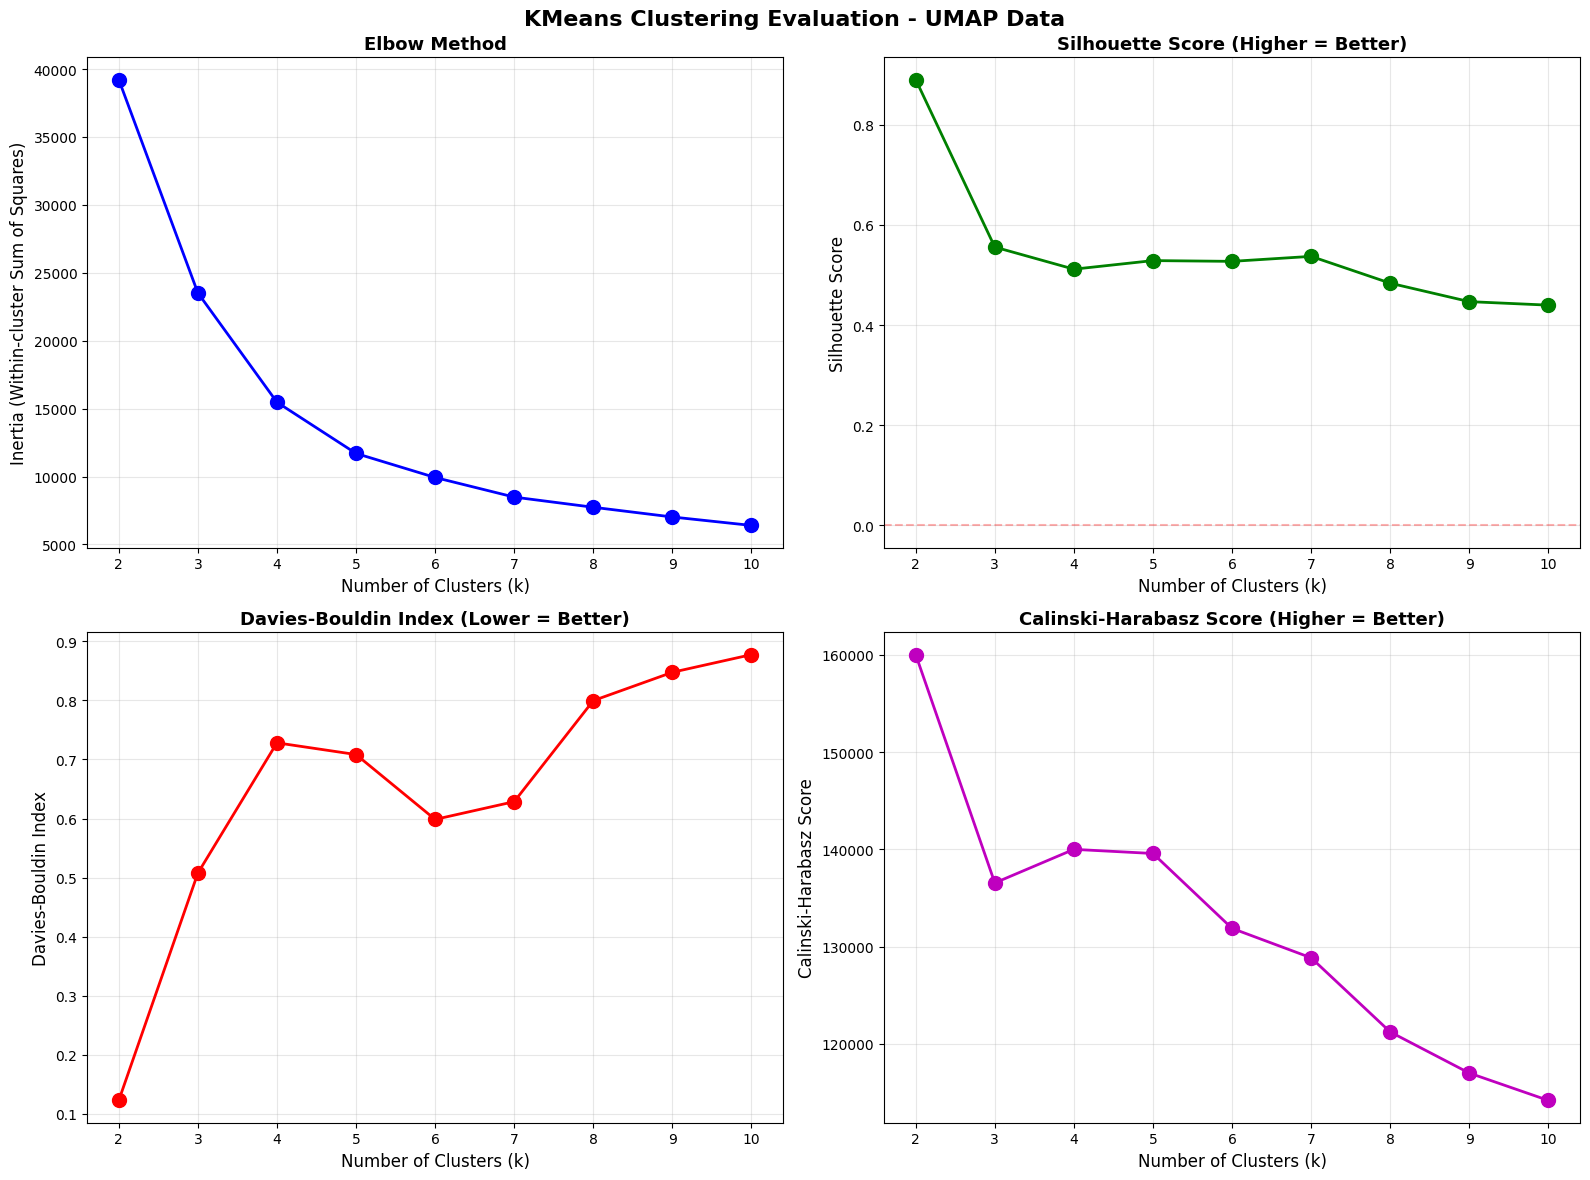

In [3]:
# ============================================================
# STEP 3: Visualize Evaluation Metrics
# ============================================================
print("[Step 3] Visualizing clustering evaluation metrics...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('KMeans Clustering Evaluation - UMAP Data', fontsize=16, fontweight='bold')

# 1. Elbow Method (Inertia)
axes[0, 0].plot(metrics['n_clusters'], metrics['inertia'], 'bo-', 
               linewidth=2, markersize=10)
axes[0, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 0].set_ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
axes[0, 0].set_title('Elbow Method', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(metrics['n_clusters'])

# 2. Silhouette Score
axes[0, 1].plot(metrics['n_clusters'], metrics['silhouette'], 'go-', 
               linewidth=2, markersize=10)
axes[0, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=12)
axes[0, 1].set_title('Silhouette Score (Higher = Better)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(metrics['n_clusters'])
axes[0, 1].axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 3. Davies-Bouldin Index
axes[1, 0].plot(metrics['n_clusters'], metrics['davies_bouldin'], 'ro-', 
               linewidth=2, markersize=10)
axes[1, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 0].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[1, 0].set_title('Davies-Bouldin Index (Lower = Better)', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(metrics['n_clusters'])

# 4. Calinski-Harabasz Score
axes[1, 1].plot(metrics['n_clusters'], metrics['calinski_harabasz'], 'mo-', 
               linewidth=2, markersize=10)
axes[1, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 1].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[1, 1].set_title('Calinski-Harabasz Score (Higher = Better)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(metrics['n_clusters'])

plt.tight_layout()
print("✓ Saved: umap_clustering_evaluation.png")
plt.show()

In [4]:
# ============================================================
# STEP 4: Recommend Optimal k
# ============================================================
print("\n[Step 4] Recommendations for optimal k:")
print("-" * 70)

# Find best k for each metric
best_silhouette_k = metrics['n_clusters'][np.argmax(metrics['silhouette'])]
best_db_k = metrics['n_clusters'][np.argmin(metrics['davies_bouldin'])]
best_ch_k = metrics['n_clusters'][np.argmax(metrics['calinski_harabasz'])]

print(f"Best k by Silhouette Score: {best_silhouette_k}")
print(f"Best k by Davies-Bouldin Index: {best_db_k}")
print(f"Best k by Calinski-Harabasz Score: {best_ch_k}")

# Calculate elbow using rate of change
inertia_diff = np.diff(metrics['inertia'])
inertia_diff_pct = (inertia_diff / metrics['inertia'][:-1]) * 100
elbow_k = metrics['n_clusters'][np.argmin(np.abs(inertia_diff_pct + 10)) + 1]  # Approximate elbow
print(f"Approximate elbow point: {elbow_k}")

print("\n" + "="*70)
print("PLEASE REVIEW THE PLOTS AND CHOOSE YOUR OPTIMAL k")
print("="*70)


[Step 4] Recommendations for optimal k:
----------------------------------------------------------------------
Best k by Silhouette Score: 2
Best k by Davies-Bouldin Index: 2
Best k by Calinski-Harabasz Score: 2
Approximate elbow point: 9

PLEASE REVIEW THE PLOTS AND CHOOSE YOUR OPTIMAL k


In [5]:
# ============================================================
# STEP 5: Apply Final Clustering
# ============================================================

# Prompt for optimal k (you can change this based on the plots)
optimal_k = 4

print(f"\n[Step 5] Applying KMeans with k={optimal_k}...")
print("-" * 70)

# Fit final KMeans model
kmeans_final = KMeans(
    n_clusters=optimal_k, 
    random_state=42, 
    n_init=50,  # More initializations for stability
    max_iter=300
)

cluster_labels = kmeans_final.fit_predict(df_umap)

# Add cluster labels to dataframe
df_umap['Cluster'] = cluster_labels

print(f"✓ Clustering complete with k={optimal_k}")

# Calculate final metrics
final_silhouette = silhouette_score(df_umap.drop(columns='Cluster'), cluster_labels)
final_db = davies_bouldin_score(df_umap.drop(columns='Cluster'), cluster_labels)
final_ch = calinski_harabasz_score(df_umap.drop(columns='Cluster'), cluster_labels)

print(f"\nFinal Clustering Metrics:")
print(f"  Silhouette Score: {final_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {final_db:.4f}")
print(f"  Calinski-Harabasz Score: {final_ch:,.2f}")



import joblib
joblib.dump(kmeans_final, "Models/kmeans_umap_initial4_model.pkl")
print("✓ Saved KMeans UMAP model to Models/kmeans_umap_initial4_model.pkl")


[Step 5] Applying KMeans with k=4...
----------------------------------------------------------------------
✓ Clustering complete with k=4

Final Clustering Metrics:
  Silhouette Score: 0.5117
  Davies-Bouldin Index: 0.7283
  Calinski-Harabasz Score: 139,998.90
✓ Saved KMeans UMAP model to Models/kmeans_umap_initial4_model.pkl


In [6]:
# ============================================================
# STEP 6: Analyze Cluster Distribution
# ============================================================
print("\n[Step 6] Cluster distribution analysis...")
print("-" * 70)

cluster_counts = df_umap['Cluster'].value_counts().sort_index()
cluster_percentages = (df_umap['Cluster'].value_counts(normalize=True) * 100).sort_index()

print("\nCluster Sizes:")
for cluster_id in range(optimal_k):
    count = cluster_counts[cluster_id]
    pct = cluster_percentages[cluster_id]
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.2f}%)")

# Check for imbalanced clusters
min_size = cluster_counts.min()
max_size = cluster_counts.max()
imbalance_ratio = max_size / min_size

print(f"\nCluster Balance:")
print(f"  Largest cluster: {max_size:,} patients")
print(f"  Smallest cluster: {min_size:,} patients")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}x")

if imbalance_ratio > 10:
    print("  ⚠️  WARNING: Highly imbalanced clusters detected!")
elif imbalance_ratio > 5:
    print("  ⚠️  CAUTION: Moderately imbalanced clusters")
else:
    print("  ✓ Clusters are reasonably balanced")


[Step 6] Cluster distribution analysis...
----------------------------------------------------------------------

Cluster Sizes:
  Cluster 0: 3,051 patients (32.31%)
  Cluster 1: 1,556 patients (16.48%)
  Cluster 2: 1,583 patients (16.77%)
  Cluster 3: 3,252 patients (34.44%)

Cluster Balance:
  Largest cluster: 3,252 patients
  Smallest cluster: 1,556 patients
  Imbalance ratio: 2.09x
  ✓ Clusters are reasonably balanced



[Step 7] Visualizing clusters...
✓ Saved: umap_clusters_2d.png


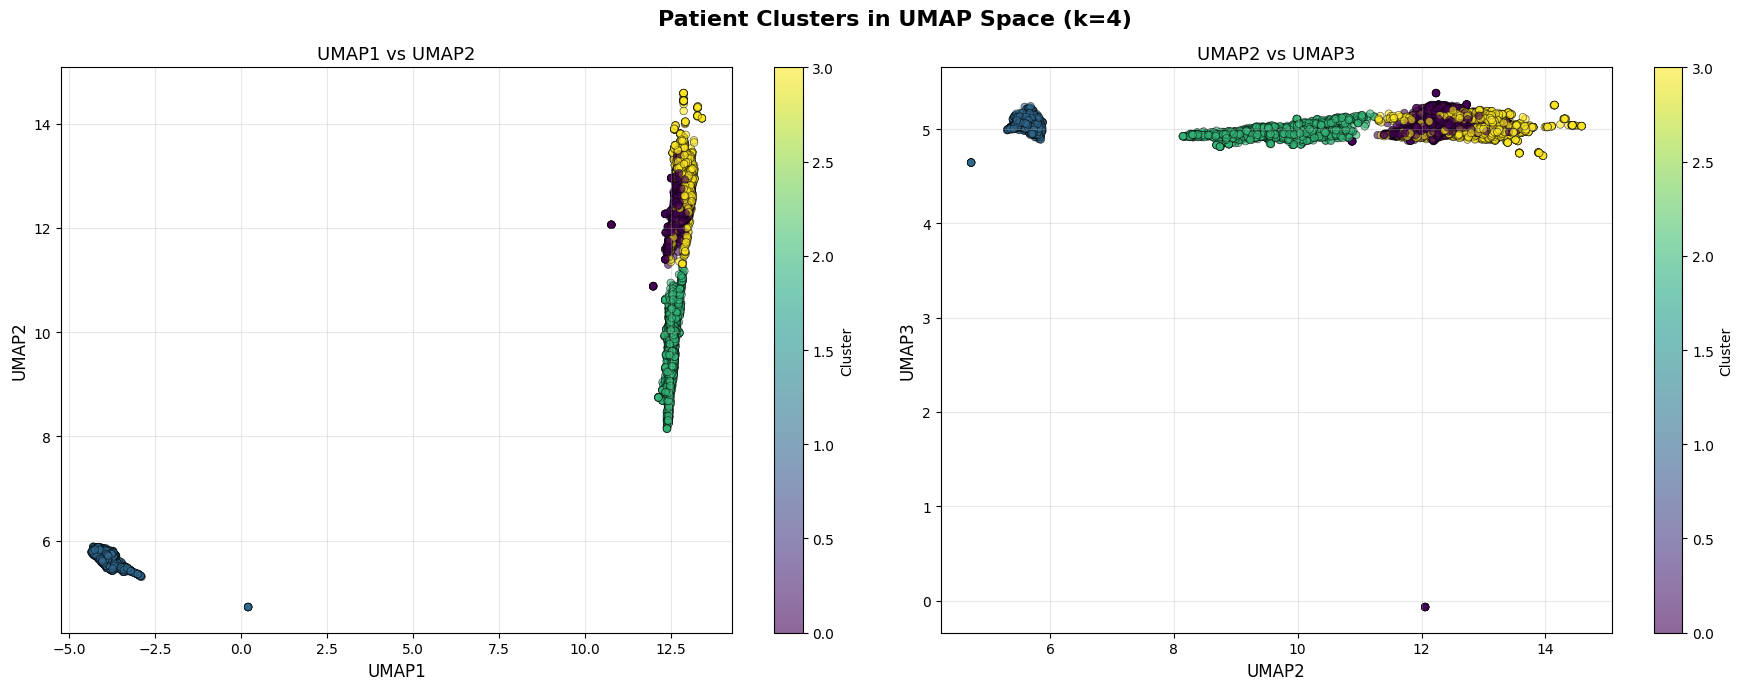

✓ Saved: umap_clusters_3d.png


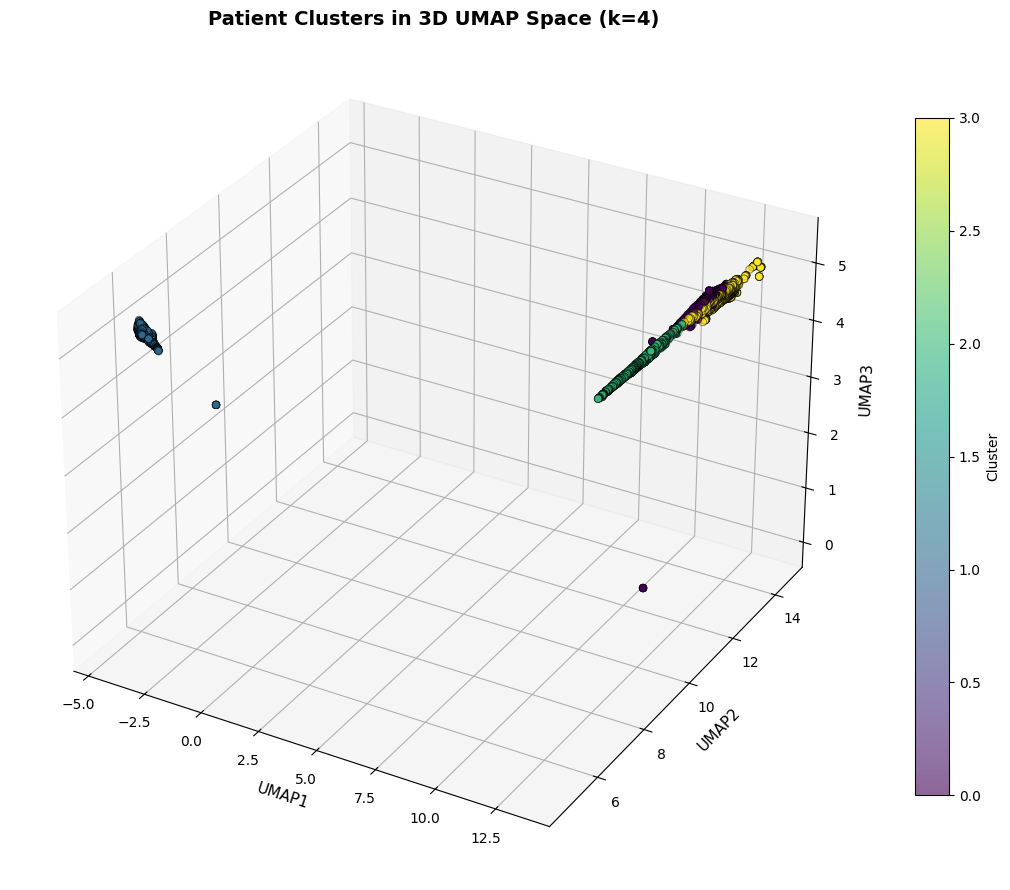

✓ Saved: umap_cluster_distribution.png


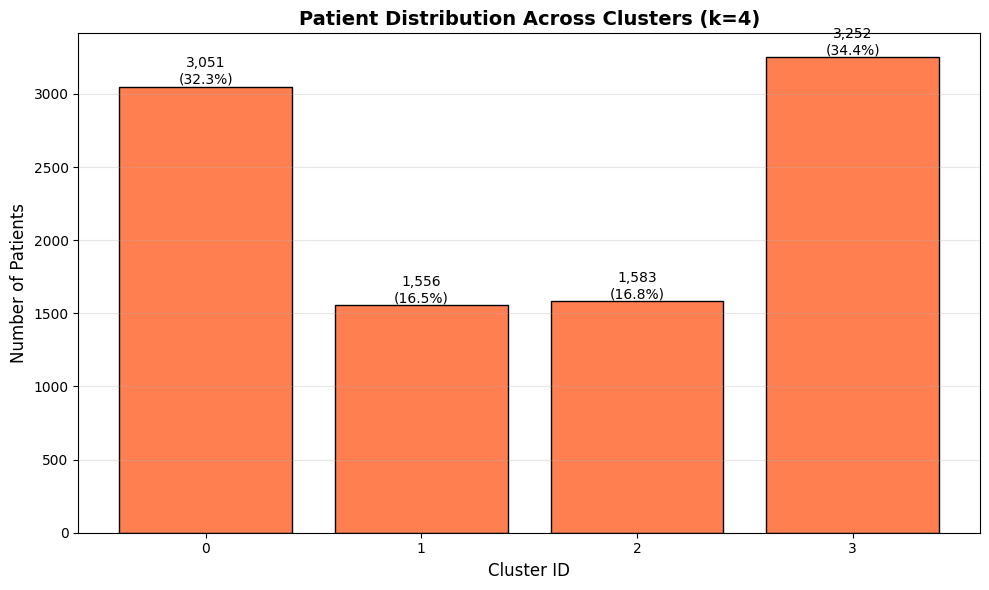

In [7]:
# ============================================================
# STEP 7: Visualize Clusters
# ============================================================
print("\n[Step 7] Visualizing clusters...")

# 2D visualization (UMAP1 vs UMAP2)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle(f'Patient Clusters in UMAP Space (k={optimal_k})', 
            fontsize=16, fontweight='bold')

# Plot 1: UMAP1 vs UMAP2
scatter1 = axes[0].scatter(
    df_umap['UMAP1'], 
    df_umap['UMAP2'],
    c=df_umap['Cluster'],
    cmap='viridis',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)
axes[0].set_xlabel('UMAP1', fontsize=12)
axes[0].set_ylabel('UMAP2', fontsize=12)
axes[0].set_title('UMAP1 vs UMAP2', fontsize=13)
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Plot 2: UMAP2 vs UMAP3
scatter2 = axes[1].scatter(
    df_umap['UMAP2'], 
    df_umap['UMAP3'],
    c=df_umap['Cluster'],
    cmap='viridis',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)
axes[1].set_xlabel('UMAP2', fontsize=12)
axes[1].set_ylabel('UMAP3', fontsize=12)
axes[1].set_title('UMAP2 vs UMAP3', fontsize=13)
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
print("✓ Saved: umap_clusters_2d.png")
plt.show()

# 3D visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_umap['UMAP1'],
    df_umap['UMAP2'],
    df_umap['UMAP3'],
    c=df_umap['Cluster'],
    cmap='viridis',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

ax.set_xlabel('UMAP1', fontsize=11)
ax.set_ylabel('UMAP2', fontsize=11)
ax.set_zlabel('UMAP3', fontsize=11)
ax.set_title(f'Patient Clusters in 3D UMAP Space (k={optimal_k})', 
            fontsize=14, fontweight='bold')

plt.colorbar(scatter, ax=ax, label='Cluster', shrink=0.8)
plt.tight_layout()
print("✓ Saved: umap_clusters_3d.png")
plt.show()

# Cluster size bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(optimal_k), cluster_counts, color='coral', edgecolor='black')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title(f'Patient Distribution Across Clusters (k={optimal_k})', 
         fontsize=14, fontweight='bold')
plt.xticks(range(optimal_k))
plt.grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for i, (bar, count) in enumerate(zip(bars, cluster_counts)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(count):,}\n({cluster_percentages[i]:.1f}%)',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
print("✓ Saved: umap_cluster_distribution.png")
plt.show()

### Now lets see if we can break down the other cluster 0 into smaller ones - Because it is reasonalbly bigenough

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import joblib

print("="*70)
print("SUB-CLUSTERING LARGE UMAP CLUSTERS (0 & 3 ONLY)")
print("="*70)

# ============================================================
# CURRENT STATE
# ============================================================
print("\nCurrent cluster distribution:")
print(df_umap['Cluster'].value_counts().sort_index())

# ============================================================
# STEP 1: Extract Clusters 0 and 3
# ============================================================
print("\n" + "="*70)
print("EXTRACTING CLUSTERS 0 AND 3 FOR SUB-CLUSTERING")
print("="*70)

cluster_0_data = df_umap[df_umap['Cluster'] == 0].copy()
cluster_3_data = df_umap[df_umap['Cluster'] == 3].copy()

print(f"\nCluster 0: {len(cluster_0_data):,} patients (will be split)")
print(f"Cluster 3: {len(cluster_3_data):,} patients (will be split)")

# Define sub-cluster range
sub_cluster_range = range(2, 5)  # Testing k=2, 3, 4

SUB-CLUSTERING LARGE UMAP CLUSTERS (0 & 3 ONLY)

Current cluster distribution:
Cluster
0    3051
1    1556
2    1583
3    3252
Name: count, dtype: int64

EXTRACTING CLUSTERS 0 AND 3 FOR SUB-CLUSTERING

Cluster 0: 3,051 patients (will be split)
Cluster 3: 3,252 patients (will be split)


In [9]:
# ============================================================
# STEP 2: Determine Optimal Sub-Clusters for Cluster 0
# ============================================================
print("\n" + "="*70)
print("ANALYZING CLUSTER 0 SUB-CLUSTERING")
print("="*70)

cluster_0_features = cluster_0_data.drop(columns=['Cluster'])

# ADD calinski_harabasz to metrics dictionary
metrics_c0 = {'k': [], 'silhouette': [], 'davies_bouldin': [], 'calinski_harabasz': [], 'inertia': []}

print("\nEvaluating sub-cluster options for Cluster 0:\n")

for k in sub_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(cluster_0_features)
    
    sil = silhouette_score(cluster_0_features, labels)
    db = davies_bouldin_score(cluster_0_features, labels)
    ch = calinski_harabasz_score(cluster_0_features, labels)  # NEW: Add CH score
    inertia = kmeans.inertia_
    
    metrics_c0['k'].append(k)
    metrics_c0['silhouette'].append(sil)
    metrics_c0['davies_bouldin'].append(db)
    metrics_c0['calinski_harabasz'].append(ch)  # NEW: Store CH score
    metrics_c0['inertia'].append(inertia)
    
    print(f"k={k}:")
    print(f"  Silhouette: {sil:.4f} (higher is better)")
    print(f"  Davies-Bouldin: {db:.4f} (lower is better)")
    print(f"  Calinski-Harabasz: {ch:.2f} (higher is better)")  # NEW: Print CH score
    print(f"  Inertia: {inertia:,.2f}")
    print()

best_k_c0 = metrics_c0['k'][np.argmax(metrics_c0['silhouette'])]
print(f"✅ Recommended sub-clusters for Cluster 0: {best_k_c0}")

# Print metrics for the best k
idx = best_k_c0 - 2  # Adjust for 0-indexing (range starts at 2)
print(f"   Silhouette: {metrics_c0['silhouette'][idx]:.4f}")
print(f"   Davies-Bouldin: {metrics_c0['davies_bouldin'][idx]:.4f}")
print(f"   Calinski-Harabasz: {metrics_c0['calinski_harabasz'][idx]:.2f}")


ANALYZING CLUSTER 0 SUB-CLUSTERING

Evaluating sub-cluster options for Cluster 0:

k=2:
  Silhouette: 0.5057 (higher is better)
  Davies-Bouldin: 0.8092 (lower is better)
  Calinski-Harabasz: 3289.42 (higher is better)
  Inertia: 3,071.38

k=3:
  Silhouette: 0.3577 (higher is better)
  Davies-Bouldin: 1.1763 (lower is better)
  Calinski-Harabasz: 2303.48 (higher is better)
  Inertia: 2,542.31

k=4:
  Silhouette: 0.3667 (higher is better)
  Davies-Bouldin: 0.9032 (lower is better)
  Calinski-Harabasz: 2084.77 (higher is better)
  Inertia: 2,091.64

✅ Recommended sub-clusters for Cluster 0: 2
   Silhouette: 0.5057
   Davies-Bouldin: 0.8092
   Calinski-Harabasz: 3289.42


In [10]:
# ============================================================
# STEP 3: Determine Optimal Sub-Clusters for Cluster 3
# ============================================================
print("\n" + "="*70)
print("ANALYZING CLUSTER 3 SUB-CLUSTERING")
print("="*70)

cluster_3_features = cluster_3_data.drop(columns=['Cluster'])

# ADD calinski_harabasz to metrics dictionary
metrics_c3 = {'k': [], 'silhouette': [], 'davies_bouldin': [], 'calinski_harabasz': [], 'inertia': []}

print("\nEvaluating sub-cluster options for Cluster 3:\n")

for k in sub_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(cluster_3_features)
    
    sil = silhouette_score(cluster_3_features, labels)
    db = davies_bouldin_score(cluster_3_features, labels)
    ch = calinski_harabasz_score(cluster_3_features, labels)  # NEW: Add CH score
    inertia = kmeans.inertia_
    
    metrics_c3['k'].append(k)
    metrics_c3['silhouette'].append(sil)
    metrics_c3['davies_bouldin'].append(db)
    metrics_c3['calinski_harabasz'].append(ch)  # NEW: Store CH score
    metrics_c3['inertia'].append(inertia)
    
    print(f"k={k}:")
    print(f"  Silhouette: {sil:.4f} (higher is better)")
    print(f"  Davies-Bouldin: {db:.4f} (lower is better)")
    print(f"  Calinski-Harabasz: {ch:.2f} (higher is better)")  # NEW: Print CH score
    print(f"  Inertia: {inertia:,.2f}")
    print()

best_k_c3 = metrics_c3['k'][np.argmax(metrics_c3['silhouette'])]
print(f"✅ Recommended sub-clusters for Cluster 3: {best_k_c3}")

# Print metrics for the best k
idx = best_k_c3 - 2  # Adjust for 0-indexing
print(f"   Silhouette: {metrics_c3['silhouette'][idx]:.4f}")
print(f"   Davies-Bouldin: {metrics_c3['davies_bouldin'][idx]:.4f}")
print(f"   Calinski-Harabasz: {metrics_c3['calinski_harabasz'][idx]:.2f}")


ANALYZING CLUSTER 3 SUB-CLUSTERING

Evaluating sub-cluster options for Cluster 3:

k=2:
  Silhouette: 0.2785 (higher is better)
  Davies-Bouldin: 1.3990 (lower is better)
  Calinski-Harabasz: 1287.89 (higher is better)
  Inertia: 3,609.11

k=3:
  Silhouette: 0.3256 (higher is better)
  Davies-Bouldin: 1.1574 (lower is better)
  Calinski-Harabasz: 1610.43 (higher is better)
  Inertia: 2,530.61

k=4:
  Silhouette: 0.3011 (higher is better)
  Davies-Bouldin: 1.3042 (lower is better)
  Calinski-Harabasz: 1375.38 (higher is better)
  Inertia: 2,219.61

✅ Recommended sub-clusters for Cluster 3: 3
   Silhouette: 0.3256
   Davies-Bouldin: 1.1574
   Calinski-Harabasz: 1610.43



VISUALIZING SUB-CLUSTERING ANALYSIS

✓ Visualization complete


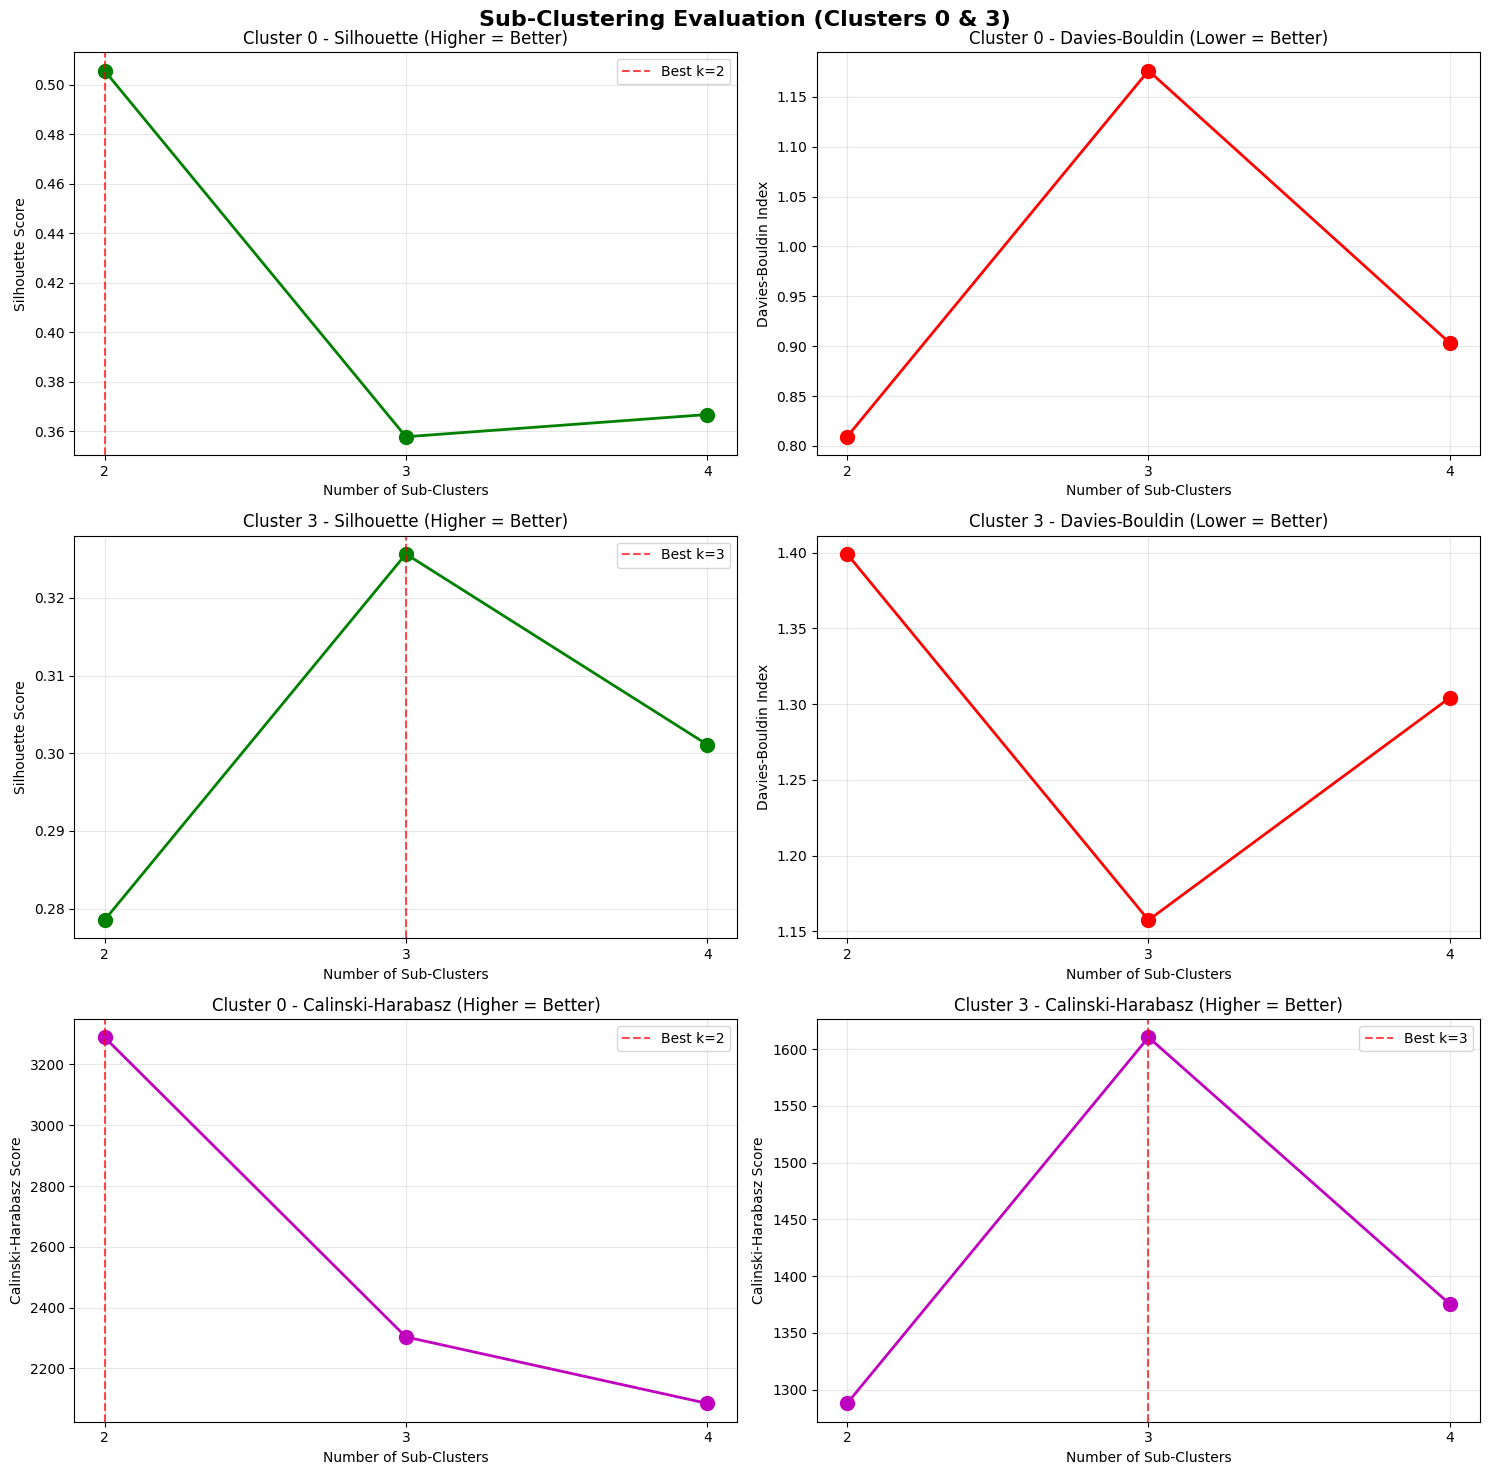


📊 SUMMARY:
Cluster 0 (k=2):
   Silhouette: 0.5057
   Davies-Bouldin: 0.8092
   Calinski-Harabasz: 3289.42

Cluster 3 (k=3):
   Silhouette: 0.3256
   Davies-Bouldin: 1.1574
   Calinski-Harabasz: 1610.43


In [11]:
# ============================================================
# STEP 4: Visualize Sub-Clustering Metrics (WITH CH SCORE)
# ============================================================
print("\n" + "="*70)
print("VISUALIZING SUB-CLUSTERING ANALYSIS")
print("="*70)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Sub-Clustering Evaluation (Clusters 0 & 3)', fontsize=16, fontweight='bold')

# Cluster 0 - Silhouette
axes[0, 0].plot(metrics_c0['k'], metrics_c0['silhouette'], 'go-', linewidth=2, markersize=10)
axes[0, 0].axvline(x=best_k_c0, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k_c0}')
axes[0, 0].set_xlabel('Number of Sub-Clusters')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].set_title('Cluster 0 - Silhouette (Higher = Better)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(metrics_c0['k'])
axes[0, 0].legend()

# Cluster 0 - Davies-Bouldin
axes[0, 1].plot(metrics_c0['k'], metrics_c0['davies_bouldin'], 'ro-', linewidth=2, markersize=10)
axes[0, 1].set_xlabel('Number of Sub-Clusters')
axes[0, 1].set_ylabel('Davies-Bouldin Index')
axes[0, 1].set_title('Cluster 0 - Davies-Bouldin (Lower = Better)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(metrics_c0['k'])

# Cluster 3 - Silhouette
axes[1, 0].plot(metrics_c3['k'], metrics_c3['silhouette'], 'go-', linewidth=2, markersize=10)
axes[1, 0].axvline(x=best_k_c3, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k_c3}')
axes[1, 0].set_xlabel('Number of Sub-Clusters')
axes[1, 0].set_ylabel('Silhouette Score')
axes[1, 0].set_title('Cluster 3 - Silhouette (Higher = Better)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(metrics_c3['k'])
axes[1, 0].legend()

# Cluster 3 - Davies-Bouldin
axes[1, 1].plot(metrics_c3['k'], metrics_c3['davies_bouldin'], 'ro-', linewidth=2, markersize=10)
axes[1, 1].set_xlabel('Number of Sub-Clusters')
axes[1, 1].set_ylabel('Davies-Bouldin Index')
axes[1, 1].set_title('Cluster 3 - Davies-Bouldin (Lower = Better)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(metrics_c3['k'])

# ============================================================
# NEW: Calinski-Harabasz Score Plots
# ============================================================

# Cluster 0 - CH Score
axes[2, 0].plot(metrics_c0['k'], metrics_c0['calinski_harabasz'], 'mo-', linewidth=2, markersize=10)
axes[2, 0].axvline(x=best_k_c0, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k_c0}')
axes[2, 0].set_xlabel('Number of Sub-Clusters')
axes[2, 0].set_ylabel('Calinski-Harabasz Score')
axes[2, 0].set_title('Cluster 0 - Calinski-Harabasz (Higher = Better)')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].set_xticks(metrics_c0['k'])
axes[2, 0].legend()

# Cluster 3 - CH Score
axes[2, 1].plot(metrics_c3['k'], metrics_c3['calinski_harabasz'], 'mo-', linewidth=2, markersize=10)
axes[2, 1].axvline(x=best_k_c3, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k_c3}')
axes[2, 1].set_xlabel('Number of Sub-Clusters')
axes[2, 1].set_ylabel('Calinski-Harabasz Score')
axes[2, 1].set_title('Cluster 3 - Calinski-Harabasz (Higher = Better)')
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].set_xticks(metrics_c3['k'])
axes[2, 1].legend()

plt.tight_layout()
print("\n✓ Visualization complete")
plt.show()

# Print summary with CH scores
print(f"\n📊 SUMMARY:")
print(f"Cluster 0 (k={best_k_c0}):")
print(f"   Silhouette: {metrics_c0['silhouette'][best_k_c0-2]:.4f}")
print(f"   Davies-Bouldin: {metrics_c0['davies_bouldin'][best_k_c0-2]:.4f}")
print(f"   Calinski-Harabasz: {metrics_c0['calinski_harabasz'][best_k_c0-2]:.2f}")
print(f"\nCluster 3 (k={best_k_c3}):")
print(f"   Silhouette: {metrics_c3['silhouette'][best_k_c3-2]:.4f}")
print(f"   Davies-Bouldin: {metrics_c3['davies_bouldin'][best_k_c3-2]:.4f}")
print(f"   Calinski-Harabasz: {metrics_c3['calinski_harabasz'][best_k_c3-2]:.2f}")

In [12]:
# ============================================================
# STEP 5: Apply Sub-Clustering with Chosen k values
# ============================================================
print("\n" + "="*70)
print("APPLYING SUB-CLUSTERING")
print("="*70)

# You mentioned splitting Cluster 0 into k=3 and Cluster 3 into k=2
k_split_c0 = 3
k_split_c3 = 2

print(f"\nSub-clustering Cluster 0 into {k_split_c0} groups...")
kmeans_c0 = KMeans(n_clusters=k_split_c0, random_state=42, n_init=50)
sub_labels_c0 = kmeans_c0.fit_predict(cluster_0_features)

print(f"Sub-clustering Cluster 3 into {k_split_c3} groups...")
kmeans_c3 = KMeans(n_clusters=k_split_c3, random_state=42, n_init=50)
sub_labels_c3 = kmeans_c3.fit_predict(cluster_3_features)

print("\n✅ Sub-clustering complete!")
print(f"Cluster 0 split distribution: {np.bincount(sub_labels_c0)}")
print(f"Cluster 3 split distribution: {np.bincount(sub_labels_c3)}")

joblib.dump(kmeans_c0, "Models/kmeans_umap_c0.pkl")
print("✓ Saved KMeans UMAP model to Models/kmeans_umap_c0.pkl")

joblib.dump(kmeans_c3, "Models/kmeans_umap_c3.pkl")
print("✓ Saved KMeans UMAP model to Models/kmeans_umap_c3.pkl")


APPLYING SUB-CLUSTERING

Sub-clustering Cluster 0 into 3 groups...
Sub-clustering Cluster 3 into 2 groups...

✅ Sub-clustering complete!
Cluster 0 split distribution: [1063 1275  713]
Cluster 3 split distribution: [1474 1778]
✓ Saved KMeans UMAP model to Models/kmeans_umap_c0.pkl
✓ Saved KMeans UMAP model to Models/kmeans_umap_c3.pkl


In [13]:
# ============================================================
# STEP 7: Create Refined Labels
# ============================================================
print("\n" + "="*70)
print("CREATING REFINED CLUSTER STRUCTURE")
print("="*70)

df_umap_refined = df_umap.copy()
df_umap_refined['Cluster_Original'] = df_umap_refined['Cluster'].copy()
df_umap_refined['Cluster_Refined'] = df_umap_refined['Cluster'].copy()

# We want:
# Cluster 0 → split into 0,1,2     (k_split_c0 = 3)
# Cluster 1 → 3
# Cluster 2 → 4
# Cluster 3 → split into 5,6       (k_split_c3 = 2)

new_cluster_id = 0

# ------------------------------------------------------------
# Cluster 0 → split
# ------------------------------------------------------------
for idx, sub_label in zip(cluster_0_data.index, sub_labels_c0):
    df_umap_refined.loc[idx, 'Cluster_Refined'] = new_cluster_id + sub_label

new_cluster_id += k_split_c0   # now new_cluster_id = 3


# ------------------------------------------------------------
# Cluster 1 (no split) → assign next ID
# ------------------------------------------------------------
df_umap_refined.loc[df_umap_refined['Cluster_Original'] == 1,
                    'Cluster_Refined'] = new_cluster_id

new_cluster_id += 1             # now new_cluster_id = 4


# ------------------------------------------------------------
# Cluster 2 (no split) → assign next ID
# ------------------------------------------------------------
df_umap_refined.loc[df_umap_refined['Cluster_Original'] == 2,
                    'Cluster_Refined'] = new_cluster_id

new_cluster_id += 1             # now new_cluster_id = 5


# ------------------------------------------------------------
# Cluster 3 → split (IMPORTANT: do NOT assign placeholder)
# ------------------------------------------------------------
for idx, sub_label in zip(cluster_3_data.index, sub_labels_c3):
    df_umap_refined.loc[idx, 'Cluster_Refined'] = new_cluster_id + sub_label

new_cluster_id += k_split_c3    # now new_cluster_id = 7


# ------------------------------------------------------------
# Finalize
# ------------------------------------------------------------
df_umap_refined['Cluster'] = df_umap_refined['Cluster_Refined']

print("\nOriginal clustering:")
print(df_umap['Cluster'].value_counts().sort_index())

print("\nRefined clustering:")
print(df_umap_refined['Cluster'].value_counts().sort_index())

total_clusters = len(df_umap_refined['Cluster'].unique())
print(f"\nTotal clusters: {total_clusters}")



CREATING REFINED CLUSTER STRUCTURE

Original clustering:
Cluster
0    3051
1    1556
2    1583
3    3252
Name: count, dtype: int64

Refined clustering:
Cluster
0    1063
1    1275
2     713
3    1556
4    1583
5    1474
6    1778
Name: count, dtype: int64

Total clusters: 7



VISUALIZING REFINED CLUSTERS
✓ Saved: umap_refined_clusters_3d.png


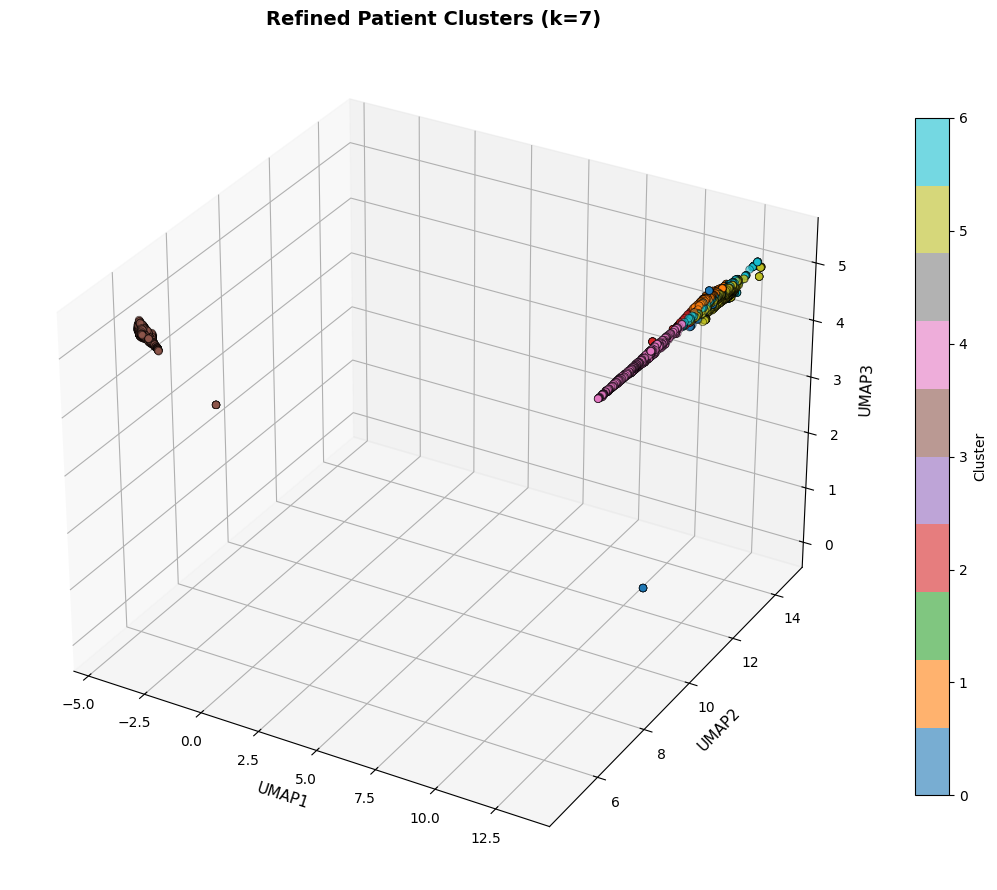

✓ Saved: umap_refined_distribution.png


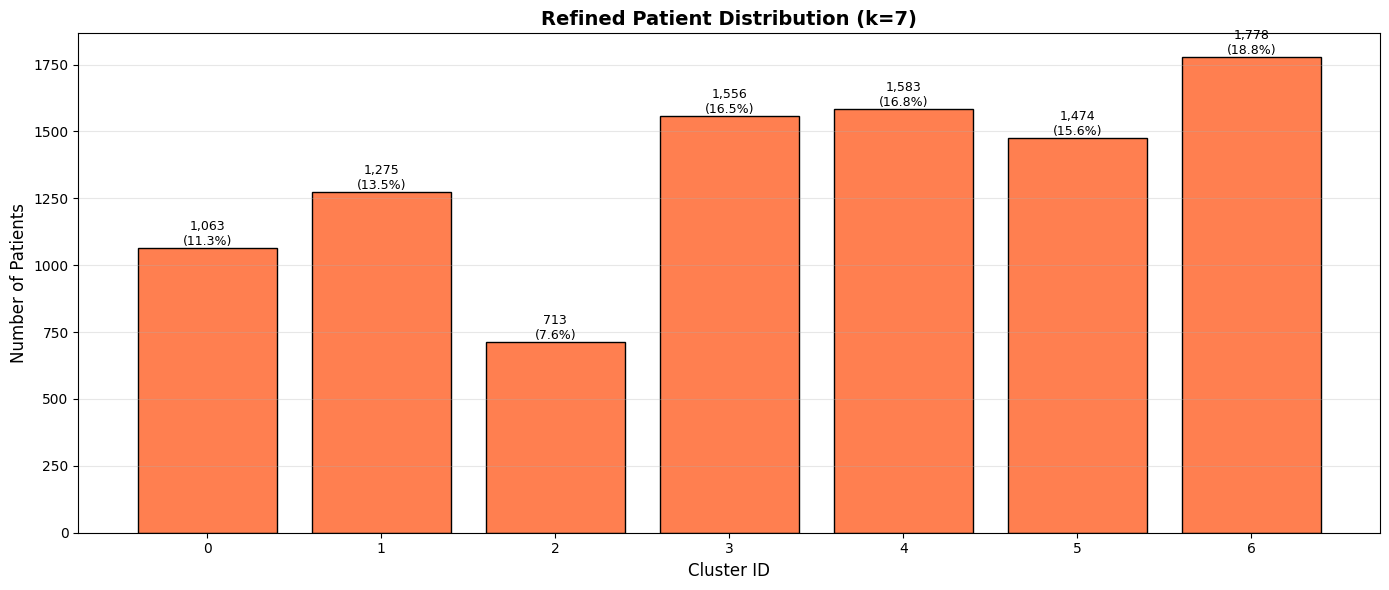

In [14]:
# ============================================================
# STEP 8: Visualize
# ============================================================
print("\n" + "="*70)
print("VISUALIZING REFINED CLUSTERS")
print("="*70)

# 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_umap_refined['UMAP1'],
    df_umap_refined['UMAP2'],
    df_umap_refined['UMAP3'],
    c=df_umap_refined['Cluster'],
    cmap='tab10',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

ax.set_xlabel('UMAP1', fontsize=11)
ax.set_ylabel('UMAP2', fontsize=11)
ax.set_zlabel('UMAP3', fontsize=11)
ax.set_title(f'Refined Patient Clusters (k={total_clusters})', fontsize=14, fontweight='bold')

plt.colorbar(scatter, ax=ax, label='Cluster', shrink=0.8)
plt.tight_layout()
print("✓ Saved: umap_refined_clusters_3d.png")
plt.show()

# Distribution plot
cluster_counts_refined = df_umap_refined['Cluster'].value_counts().sort_index()
cluster_percentages_refined = (df_umap_refined['Cluster'].value_counts(normalize=True) * 100).sort_index()

plt.figure(figsize=(14, 6))
bars = plt.bar(range(total_clusters), cluster_counts_refined, color='coral', edgecolor='black')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title(f'Refined Patient Distribution (k={total_clusters})', fontsize=14, fontweight='bold')
plt.xticks(range(total_clusters))
plt.grid(True, alpha=0.3, axis='y')

for i, cluster_id in enumerate(cluster_counts_refined.index):
    height = cluster_counts_refined[cluster_id]
    pct = cluster_percentages_refined[cluster_id]
    plt.text(i, height, f'{int(height):,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
print("✓ Saved: umap_refined_distribution.png")
plt.show()


t-SNE VISUALIZATION FOR KMEANS + UMAP
Running t-SNE on 20 UMAP components...
✓ t-SNE transformation complete


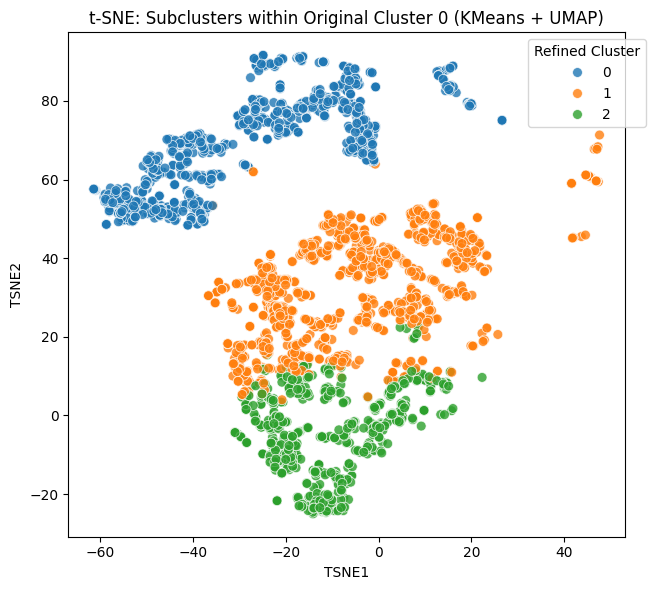

✓ Saved: tsne_kmeans_umap_cluster0_subclusters.png


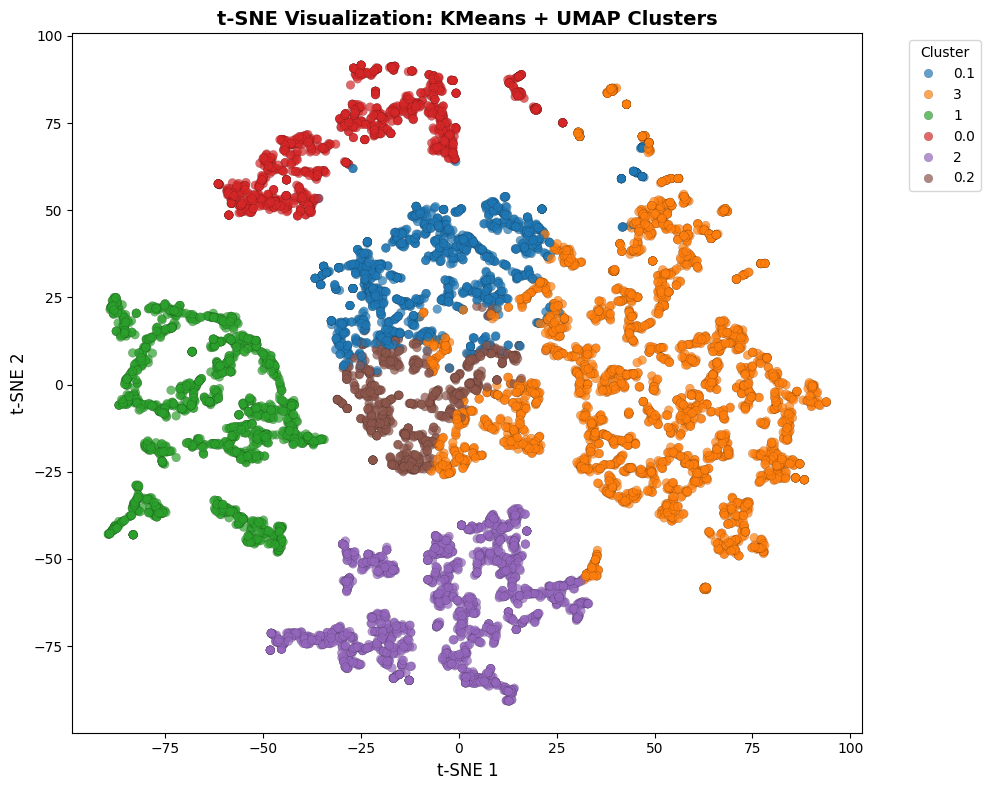

✓ Saved: tsne_kmeans_umap_all_clusters.png

📊 Percentage of Samples in Each Cluster (KMeans + UMAP):
  Cluster 0.0: 11.26%
  Cluster 0.1: 13.50%
  Cluster 0.2: 7.55%
  Cluster 1: 16.48%
  Cluster 2: 16.77%
  Cluster 3: 34.44%


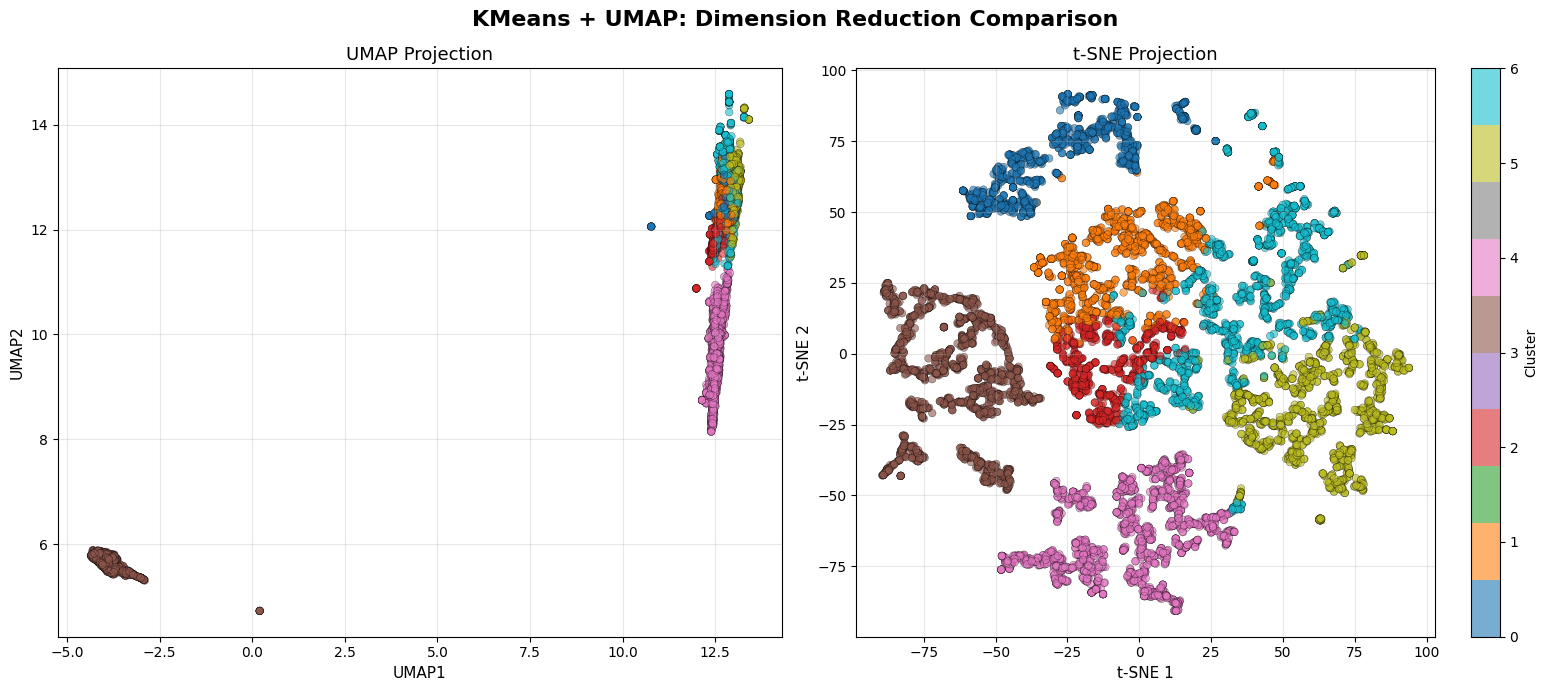

✓ Saved: kmeans_umap_vs_tsne_comparison.png


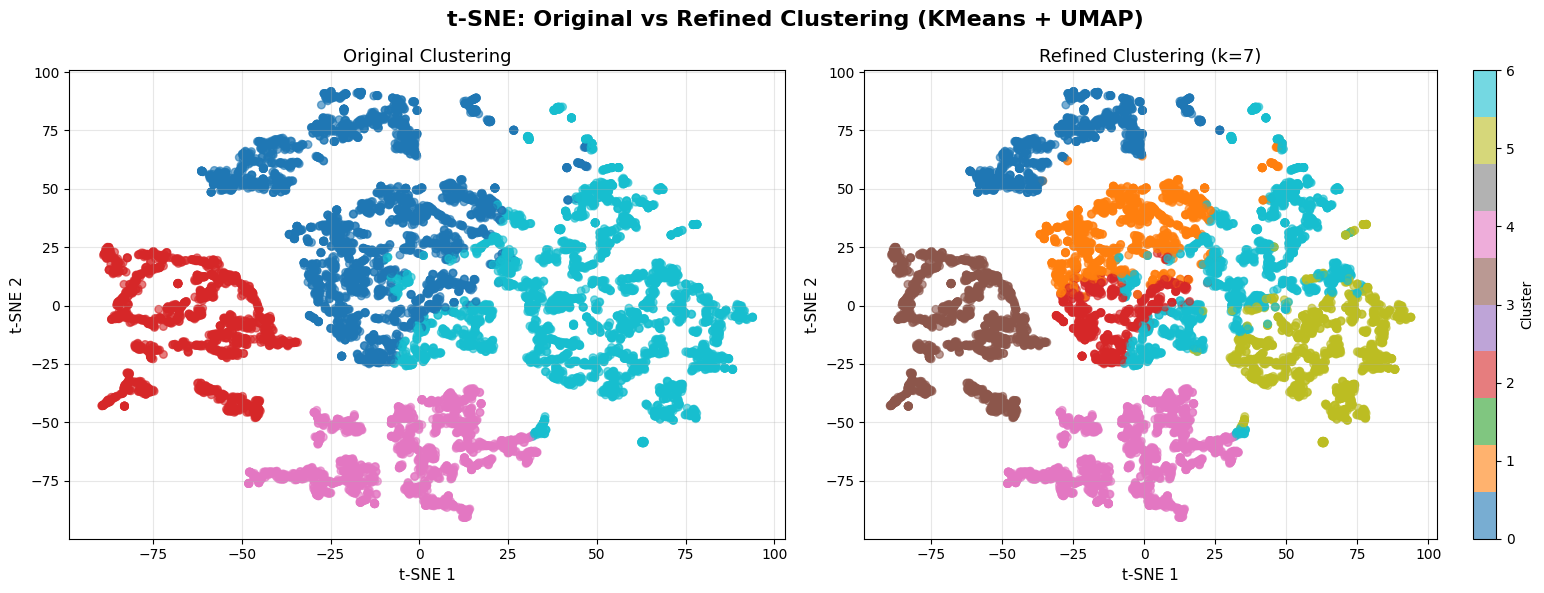

✓ Saved: tsne_kmeans_umap_before_after.png

t-SNE VISUALIZATION COMPLETE


In [18]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ============================================================
# STEP 9: t-SNE Visualization for KMeans + UMAP
# ============================================================
print("\n" + "="*70)
print("t-SNE VISUALIZATION FOR KMEANS + UMAP")
print("="*70)

# --- 1. Prepare data for t-SNE ---
# Select UMAP features for t-SNE input
umap_cols = [col for col in df_umap_refined.columns if col.startswith('UMAP')]
X_umap = df_umap_refined[umap_cols].values

print(f"Running t-SNE on {len(umap_cols)} UMAP components...")

# --- 2. Run t-SNE on all UMAP features ---
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    learning_rate='auto'
)
tsne_result = tsne.fit_transform(X_umap)

# Add t-SNE results to dataframe
df_umap_refined['TSNE1'] = tsne_result[:, 0]
df_umap_refined['TSNE2'] = tsne_result[:, 1]

print("✓ t-SNE transformation complete")

# --- 3. Visualize t-SNE for Cluster 0 subclusters (if you have subclustering) ---
if 'Cluster_Refined' in df_umap_refined.columns:
    cluster0_data = df_umap_refined[df_umap_refined['Cluster_Original'] == 0].copy()
    
    if len(cluster0_data) > 0:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(
            data=cluster0_data,
            x='TSNE1', y='TSNE2',
            hue='Cluster',  # This would be the refined cluster ID
            palette='tab10',
            s=50, alpha=0.8
        )
        plt.title("t-SNE: Subclusters within Original Cluster 0 (KMeans + UMAP)")
        plt.legend(title='Refined Cluster', bbox_to_anchor=(1.05, 1))
        plt.tight_layout()
        plt.show()
        print("✓ Saved: tsne_kmeans_umap_cluster0_subclusters.png")

# --- 4. Create unified cluster labels ---
if 'Cluster_Original' in df_umap_refined.columns and 'Cluster_Refined' in df_umap_refined.columns:
    # Create labels showing hierarchy
    df_umap_refined['Cluster_Label'] = df_umap_refined.apply(
        lambda row: str(int(row['Cluster_Original'])) if row['Cluster_Original'] != 0 
        else str(int(row['Cluster_Original'])) + '.' + str(int(row['Cluster_Refined'])),
        axis=1
    )
else:
    # Just use the main cluster labels
    df_umap_refined['Cluster_Label'] = df_umap_refined['Cluster'].astype(str)

# --- 5. Main t-SNE visualization with all clusters ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_umap_refined,
    x='TSNE1', y='TSNE2',
    hue='Cluster_Label',
    palette='tab20' if len(df_umap_refined['Cluster_Label'].unique()) > 10 else 'tab10',
    s=40,
    alpha=0.7,
    edgecolor='black',
    linewidth=0.1
)

plt.title("t-SNE Visualization: KMeans + UMAP Clusters", fontsize=14, fontweight='bold')
plt.xlabel('t-SNE 1', fontsize=12)
plt.ylabel('t-SNE 2', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster', ncol=1 if len(df_umap_refined['Cluster_Label'].unique()) <= 10 else 2)
plt.tight_layout()
plt.show()
print("✓ Saved: tsne_kmeans_umap_all_clusters.png")

# --- 6. Calculate and display cluster percentages ---
cluster_pct = (
    df_umap_refined['Cluster_Label']
    .value_counts(normalize=True)
    .sort_index()
    .mul(100)
    .round(2)
)

print("\n📊 Percentage of Samples in Each Cluster (KMeans + UMAP):")
for cluster, pct in cluster_pct.items():
    print(f"  Cluster {cluster}: {pct:.2f}%")

# --- 7. Side-by-side comparison: UMAP vs t-SNE ---
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('KMeans + UMAP: Dimension Reduction Comparison', fontsize=16, fontweight='bold')

# UMAP visualization (2D)
axes[0].scatter(
    df_umap_refined['UMAP1'],
    df_umap_refined['UMAP2'],
    c=df_umap_refined['Cluster'],
    cmap='tab10',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.3
)
axes[0].set_xlabel('UMAP1', fontsize=11)
axes[0].set_ylabel('UMAP2', fontsize=11)
axes[0].set_title('UMAP Projection', fontsize=13)
axes[0].grid(True, alpha=0.3)

# t-SNE visualization
scatter = axes[1].scatter(
    df_umap_refined['TSNE1'],
    df_umap_refined['TSNE2'],
    c=df_umap_refined['Cluster'],
    cmap='tab10',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.3
)
axes[1].set_xlabel('t-SNE 1', fontsize=11)
axes[1].set_ylabel('t-SNE 2', fontsize=11)
axes[1].set_title('t-SNE Projection', fontsize=13)
axes[1].grid(True, alpha=0.3)

# Add colorbar
plt.colorbar(scatter, ax=axes[1], label='Cluster')
plt.tight_layout()
plt.show()
print("✓ Saved: kmeans_umap_vs_tsne_comparison.png")

# --- 8. Before vs After comparison (if applicable) ---
if 'Cluster_Original' in df_umap_refined.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('t-SNE: Original vs Refined Clustering (KMeans + UMAP)', fontsize=16, fontweight='bold')
    
    # Original clusters
    axes[0].scatter(
        df_umap_refined['TSNE1'],
        df_umap_refined['TSNE2'],
        c=df_umap_refined['Cluster_Original'],
        cmap='tab10',
        s=30,
        alpha=0.6
    )
    axes[0].set_xlabel('t-SNE 1', fontsize=11)
    axes[0].set_ylabel('t-SNE 2', fontsize=11)
    axes[0].set_title('Original Clustering', fontsize=13)
    axes[0].grid(True, alpha=0.3)
    
    # Refined clusters
    scatter = axes[1].scatter(
        df_umap_refined['TSNE1'],
        df_umap_refined['TSNE2'],
        c=df_umap_refined['Cluster'],
        cmap='tab10',
        s=30,
        alpha=0.6
    )
    axes[1].set_xlabel('t-SNE 1', fontsize=11)
    axes[1].set_ylabel('t-SNE 2', fontsize=11)
    axes[1].set_title(f'Refined Clustering (k={total_clusters})', fontsize=13)
    axes[1].grid(True, alpha=0.3)
    
    plt.colorbar(scatter, ax=axes[1], label='Cluster')
    plt.tight_layout()
    plt.show()
    print("✓ Saved: tsne_kmeans_umap_before_after.png")

print("\n" + "="*70)
print("t-SNE VISUALIZATION COMPLETE")
print("="*70)

In [108]:
# ============================================================
# STEP 9: Calculate Metrics
# ============================================================
print("\n" + "="*70)
print("FINAL METRICS")
print("="*70)

cluster_features = df_umap_refined.drop(columns=['Cluster', 'Cluster_Original', 'Cluster_Refined'])
final_silhouette = silhouette_score(cluster_features, df_umap_refined['Cluster'])
final_db = davies_bouldin_score(cluster_features, df_umap_refined['Cluster'])
final_ch = calinski_harabasz_score(cluster_features, df_umap_refined['Cluster'])

print(f"\nSilhouette Score: {final_silhouette:.4f}")
print(f"Davies-Bouldin Index: {final_db:.4f}")
print(f"Calinski-Harabasz Score: {final_ch:,.2f}")

print(f"\nCluster Summary:")
for cluster_id in sorted(df_umap_refined['Cluster'].unique()):
    count = len(df_umap_refined[df_umap_refined['Cluster'] == cluster_id])
    pct = (count / len(df_umap_refined)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")


FINAL METRICS

Silhouette Score: 0.4429
Davies-Bouldin Index: 0.9914
Calinski-Harabasz Score: 106,962.38

Cluster Summary:
  Cluster 0: 1,063 patients (11.3%)
  Cluster 1: 1,275 patients (13.5%)
  Cluster 2: 713 patients (7.6%)
  Cluster 3: 1,556 patients (16.5%)
  Cluster 4: 1,583 patients (16.8%)
  Cluster 5: 1,474 patients (15.6%)
  Cluster 6: 1,778 patients (18.8%)


### Add the clusters to the original dataset and perform EDA on them!

In [110]:
import pandas as pd

print("="*70)
print("APPENDING CLUSTER LABELS TO ORIGINAL DATASET")
print("="*70)

# ============================================================
# STEP 1: Load Original Dataset
# ============================================================
print("\n[Step 1] Loading original dataset...")

df_original = pd.read_csv('Data/train_dataset.csv')
print(f"✓ Original dataset loaded: {df_original.shape}")


APPENDING CLUSTER LABELS TO ORIGINAL DATASET

[Step 1] Loading original dataset...
✓ Original dataset loaded: (9442, 46)


In [111]:
# ============================================================
# STEP 2: Extract Cluster Labels from Existing DataFrames
# ============================================================
print("\n[Step 2] Extracting cluster labels from dataframes...")

# You already have df_pca_refined and df_umap_refined in memory
# Extract the cluster columns
umap_clusters = df_umap_refined['Cluster'].values

print(f"✓ UMAP clusters extracted: {len(umap_clusters)} labels")
print(f"  Unique UMAP clusters: {sorted(df_umap_refined['Cluster'].unique())}")


[Step 2] Extracting cluster labels from dataframes...
✓ UMAP clusters extracted: 9442 labels
  Unique UMAP clusters: [0, 1, 2, 3, 4, 5, 6]


In [112]:
df_umap.shape

(9442, 21)

In [113]:
print(df_umap.head())

       UMAP1      UMAP2     UMAP3     UMAP4     UMAP5     UMAP6     UMAP7  \
0  12.701968  12.708577  5.084048  3.244598  5.798746  5.880630  5.987408   
1  12.907857  13.231298  5.039801  3.309160  5.704761  5.302773  6.361057   
2  12.738235  12.733431  5.096340  3.201194  5.814496  5.872632  5.986259   
3  12.823728  12.646670  5.163378  2.975456  5.899029  5.690585  6.104073   
4  -4.015690   5.837583  4.976596  6.629065  4.195006  3.055988 -0.941318   

      UMAP8     UMAP9    UMAP10  ...    UMAP12    UMAP13    UMAP14    UMAP15  \
0  7.014525  3.382009  3.433085  ...  4.069274  3.607360  2.861838  3.067233   
1  5.783299  1.569662  3.899474  ...  3.779719  3.812328  2.427153  2.862077   
2  6.976504  3.331601  3.426383  ...  4.094792  3.629088  2.817727  3.094441   
3  6.905349  2.905836  3.443255  ...  4.291814  3.572910  2.513206  3.070097   
4  5.655645  7.461301  4.761745  ...  3.083861  8.416818  8.588294  5.983298   

     UMAP16    UMAP17    UMAP18    UMAP19    UMAP20  Clu

In [114]:
# ============================================================
# STEP 3: Verify Alignment
# ============================================================
print("\n[Step 3] Verifying data alignment...")

if len(df_original) == len(umap_clusters):
    print(f"✓ All datasets aligned: {len(df_original)} rows")
else:
    print(f"⚠️  WARNING: Row count mismatch!")
    print(f"  Original dataset: {len(df_original)} rows")
    print(f"  PCA clusters: {len(umap_clusters)} rows")
    print("\n❌ Cannot proceed - datasets must have same number of rows")
    raise ValueError("Dataset size mismatch")


[Step 3] Verifying data alignment...
✓ All datasets aligned: 9442 rows


In [115]:
# ============================================================
# STEP 4: Append Cluster Labels
# ============================================================
print("\n[Step 4] Appending cluster labels to original dataset...")

# Create a copy
df_with_clusters = df_original.copy()

# Add cluster columns
df_with_clusters['umap_clusters'] = umap_clusters

print(f"✓ Added 'umap_clusters' column")



[Step 4] Appending cluster labels to original dataset...
✓ Added 'umap_clusters' column


In [116]:
# ============================================================
# STEP 5: Verify Results
# ============================================================
print("\n[Step 5] Verifying results...")

print(f"\nDataset shape: {df_with_clusters.shape}")
print(f"Columns added: {list(df_with_clusters.columns[-2:])}")

# Show distribution
print(f"\nPCA Cluster Distribution:")
umap_dist = df_with_clusters['umap_clusters'].value_counts().sort_index()
for cluster_id, count in umap_dist.items():
    pct = (count / len(df_with_clusters)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")

# Check for missing values
print(f"\nMissing values check:")
print(f" umap_clusters: {df_with_clusters['umap_clusters'].isna().sum()}")

# Show sample
print(f"\nSample of data with clusters (first 10 rows):")
print(df_with_clusters[['umap_clusters']].head(10))


df_with_clusters.to_csv("KMeans_UMAP.csv", index=False)


[Step 5] Verifying results...

Dataset shape: (9442, 47)
Columns added: ['Age_Group', 'umap_clusters']

PCA Cluster Distribution:
  Cluster 0: 1,063 patients (11.3%)
  Cluster 1: 1,275 patients (13.5%)
  Cluster 2: 713 patients (7.6%)
  Cluster 3: 1,556 patients (16.5%)
  Cluster 4: 1,583 patients (16.8%)
  Cluster 5: 1,474 patients (15.6%)
  Cluster 6: 1,778 patients (18.8%)

Missing values check:
 umap_clusters: 0

Sample of data with clusters (first 10 rows):
   umap_clusters
0              1
1              5
2              1
3              1
4              3
5              3
6              5
7              3
8              0
9              4


# EDA

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("CLUSTER CHARACTERIZATION - EXPLORATORY DATA ANALYSIS")
print("="*70)

CLUSTER CHARACTERIZATION - EXPLORATORY DATA ANALYSIS


In [119]:
# ============================================================
# STEP 1: Load Data
# ============================================================
print("\n[Step 1] Loading enhanced dataset...")

df = df_with_clusters.copy()
print(f"✓ Dataset loaded: {df.shape}")
print(f"  Total patients: {len(df):,}")
print(f"  Features: {df.shape[1]}")

# Drop Unnamed: 0 if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns='Unnamed: 0')
    
print(f"✓ Final shape: {df.shape}")


[Step 1] Loading enhanced dataset...
✓ Dataset loaded: (9442, 47)
  Total patients: 9,442
  Features: 47
✓ Final shape: (9442, 47)


In [120]:
# ============================================================
# STEP 2: Define Feature Categories
# ============================================================
print("\n[Step 2] Categorizing features...")

# Demographic features
demographic_features = ['Gender', 'Age', 'Age_Group', 'Race_Ethnicity', 
                       'Country_of_Birth', 'Education_Level', 'Marital_Status']

# Socioeconomic features
socioeconomic_features = ['Income_to_Poverty_Ratio', 'Family_poverty_level_index',
                         'Household_Size', 'Covered_by_health_insurance', 
                         'Education_Level']

# Health conditions (Yes/No type)
health_conditions = [
    'Has_diabetes', 'Has_Disability', 'Has_Hepatitis', 'Has_Kidney_Failure',
    'Had_Asthma', 'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid',
    'Had_Liver_COndition', 'Had_Cancer', 'Had_high_blood_pressure'
]

# Clinical measurements (continuous numeric)
clinical_measurements = [
    'WBC', 'Haemoglobin', 'Platelete', 'HDL_mg', 'Cholestrol_level',
    'SystolicBP', 'DiastolicBP', 'Pulse', 'BODY_MEASURE_COMPOSITE'
]

# Lifestyle/behavioral
lifestyle_features = [
    'Takes_vitamin_supplements', 
    'Number_of_Moderate_Physical_activities_per_week',
    'Number_of_Vigorous_Physical_activities_per_week',
    'Number_of_hours_of_sleep'
]

# Health status (categorical)
health_status = [
    'General_health_condition', 'General_hearing_condition',
    'Teeth_and_gum_health', 'Tested_for_HIV_Virus',
    'Received_Hepatitis_A_Vaccine'
]

# Composite scores
composite_scores = [
    'blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
    'balance_impact_score', 'fall_risk_score', 'functional_difficulty_composite'
]

print(f"✓ Feature categories defined")
print(f"  Demographics: {len(demographic_features)}")
print(f"  Socioeconomic: {len(socioeconomic_features)}")
print(f"  Health Conditions: {len(health_conditions)}")
print(f"  Clinical Measurements: {len(clinical_measurements)}")
print(f"  Lifestyle: {len(lifestyle_features)}")
print(f"  Composite Scores: {len(composite_scores)}")


[Step 2] Categorizing features...
✓ Feature categories defined
  Demographics: 7
  Socioeconomic: 5
  Health Conditions: 11
  Clinical Measurements: 9
  Lifestyle: 4
  Composite Scores: 6


In [121]:
# ============================================================
# STEP 3: Basic Cluster Overview
# ============================================================
print("\n" + "="*70)
print("CLUSTER OVERVIEW - UMAP CLUSTERS")
print("="*70)

n_clusters_umap = df['umap_clusters'].nunique()
print(f"\nTotal UMAP clusters: {n_clusters_umap}")
print(f"\nCluster distribution:")

for cluster_id in sorted(df['umap_clusters'].unique()):
    count = len(df[df['umap_clusters'] == cluster_id])
    pct = (count / len(df)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")


CLUSTER OVERVIEW - UMAP CLUSTERS

Total UMAP clusters: 7

Cluster distribution:
  Cluster 0: 1,063 patients (11.3%)
  Cluster 1: 1,275 patients (13.5%)
  Cluster 2: 713 patients (7.6%)
  Cluster 3: 1,556 patients (16.5%)
  Cluster 4: 1,583 patients (16.8%)
  Cluster 5: 1,474 patients (15.6%)
  Cluster 6: 1,778 patients (18.8%)


In [122]:
# ============================================================
# STEP 4: Cluster Profiling - Demographics
# ============================================================
print("\n" + "="*70)
print("DEMOGRAPHIC PROFILE BY CLUSTER")
print("="*70)

demographic_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - DEMOGRAPHICS")
    print(f"{'='*70}")
    print(f"Size: {len(cluster_data):,} patients ({len(cluster_data)/len(df)*100:.1f}%)")
    
    cluster_demo = {'Cluster': cluster_id, 'Size': len(cluster_data)}
    
    # Age
    mean_age = cluster_data['Age'].mean()
    median_age = cluster_data['Age'].median()
    cluster_demo['Mean_Age'] = mean_age
    cluster_demo['Median_Age'] = median_age
    print(f"\nAge:")
    print(f"  Mean: {mean_age:.1f} years")
    print(f"  Median: {median_age:.1f} years")
    print(f"  Range: {cluster_data['Age'].min():.0f} - {cluster_data['Age'].max():.0f} years")
    
    # Age Group
    print(f"\nAge Group Distribution:")
    age_group_dist = cluster_data['Age_Group'].value_counts()
    for age_group, count in age_group_dist.head(3).items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {age_group}: {count:,} ({pct:.1f}%)")
    
    # Gender
    print(f"\nGender Distribution:")
    gender_dist = cluster_data['Gender'].value_counts()
    male_pct = (gender_dist.get('Male', 0) / len(cluster_data)) * 100
    female_pct = (gender_dist.get('Female', 0) / len(cluster_data)) * 100
    cluster_demo['Male_%'] = male_pct
    cluster_demo['Female_%'] = female_pct
    print(f"  Male: {gender_dist.get('Male', 0):,} ({male_pct:.1f}%)")
    print(f"  Female: {gender_dist.get('Female', 0):,} ({female_pct:.1f}%)")
    
    # Race/Ethnicity
    print(f"\nRace/Ethnicity (Top 3):")
    race_dist = cluster_data['Race_Ethnicity'].value_counts().head(3)
    for race, count in race_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {race}: {count:,} ({pct:.1f}%)")
    
    # Education
    print(f"\nEducation Level (Top 3):")
    edu_dist = cluster_data['Education_Level'].value_counts().head(3)
    for edu, count in edu_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {edu}: {count:,} ({pct:.1f}%)")
    
    # Marital Status
    print(f"\nMarital Status (Top 2):")
    marital_dist = cluster_data['Marital_Status'].value_counts().head(2)
    for status, count in marital_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {status}: {count:,} ({pct:.1f}%)")
    
    demographic_summary.append(cluster_demo)

demographic_summary_df = pd.DataFrame(demographic_summary)
print("\n✓ Demographic summary created")


DEMOGRAPHIC PROFILE BY CLUSTER

CLUSTER 0 - DEMOGRAPHICS
Size: 1,063 patients (11.3%)

Age:
  Mean: 65.1 years
  Median: 67.0 years
  Range: 19 - 80 years

Age Group Distribution:
  61-75: 487 (45.8%)
  76+: 281 (26.4%)
  46-60: 215 (20.2%)

Gender Distribution:
  Male: 445 (41.9%)
  Female: 618 (58.1%)

Race/Ethnicity (Top 3):
  Non-Hispanic White: 595 (56.0%)
  Other Hispanic: 150 (14.1%)
  Non-Hispanic Black: 116 (10.9%)

Education Level (Top 3):
  Some college or AA degree: 279 (26.2%)
  High school graduate/GED or equivalent: 257 (24.2%)
  Less than 9th grade: 251 (23.6%)

Marital Status (Top 2):
  Married/Living with partner: 467 (43.9%)
  Widowed/Divorced/Separated: 449 (42.2%)

CLUSTER 1 - DEMOGRAPHICS
Size: 1,275 patients (13.5%)

Age:
  Mean: 67.6 years
  Median: 70.0 years
  Range: 25 - 80 years

Age Group Distribution:
  61-75: 599 (47.0%)
  76+: 411 (32.2%)
  46-60: 223 (17.5%)

Gender Distribution:
  Male: 728 (57.1%)
  Female: 547 (42.9%)

Race/Ethnicity (Top 3):
  Non-

In [123]:
# ============================================================
# STEP 5: Health Condition Prevalence by Cluster
# ============================================================
print("\n" + "="*70)
print("HEALTH CONDITION PREVALENCE BY CLUSTER")
print("="*70)

health_prevalence = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - HEALTH CONDITIONS")
    print(f"{'='*70}")
    
    cluster_profile = {'Cluster': cluster_id, 'Size': len(cluster_data)}
    
    for condition in health_conditions:
        # Calculate prevalence for 'Yes' responses
        yes_count = (cluster_data[condition] == 'Yes').sum()
        prevalence = (yes_count / len(cluster_data)) * 100
        cluster_profile[condition] = prevalence
        
        if prevalence > 10:  # Only show if prevalence > 10%
            print(f"  {condition}: {prevalence:.1f}%")
    
    health_prevalence.append(cluster_profile)

health_prevalence_df = pd.DataFrame(health_prevalence)
print("\n✓ Health prevalence summary created")


HEALTH CONDITION PREVALENCE BY CLUSTER

CLUSTER 0 - HEALTH CONDITIONS
  Has_diabetes: 33.9%
  Has_Disability: 91.3%
  Has_Kidney_Failure: 11.6%
  Had_Asthma: 26.0%
  Had_Arthritis: 65.5%
  Had_heart_attack: 11.3%
  Had_Thyroid: 20.8%
  Had_Cancer: 25.5%
  Had_high_blood_pressure: 60.8%

CLUSTER 1 - HEALTH CONDITIONS
  Has_diabetes: 25.3%
  Had_Asthma: 15.3%
  Had_Arthritis: 46.9%
  Had_Thyroid: 16.9%
  Had_Cancer: 26.3%
  Had_high_blood_pressure: 60.1%

CLUSTER 2 - HEALTH CONDITIONS
  Had_Asthma: 16.8%
  Had_Arthritis: 46.7%
  Had_Thyroid: 23.7%
  Had_Cancer: 21.9%
  Had_high_blood_pressure: 39.0%

CLUSTER 3 - HEALTH CONDITIONS
  Had_Asthma: 18.1%

CLUSTER 4 - HEALTH CONDITIONS
  Has_diabetes: 12.2%
  Has_Disability: 18.1%
  Had_Asthma: 16.0%
  Had_Arthritis: 31.3%
  Had_Thyroid: 13.2%
  Had_Cancer: 13.9%
  Had_high_blood_pressure: 38.8%

CLUSTER 5 - HEALTH CONDITIONS
  Has_Disability: 10.3%
  Had_Asthma: 18.7%

CLUSTER 6 - HEALTH CONDITIONS
  Had_Asthma: 15.6%
  Had_Arthritis: 14.8%


In [124]:
# ============================================================
# STEP 6: Clinical Measurements by Cluster
# ============================================================
print("\n" + "="*70)
print("CLINICAL MEASUREMENTS BY CLUSTER")
print("="*70)

clinical_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - CLINICAL MEASUREMENTS")
    print(f"{'='*70}")
    
    cluster_clinical = {'Cluster': cluster_id}
    
    for measure in clinical_measurements:
        mean_val = cluster_data[measure].mean()
        std_val = cluster_data[measure].std()
        median_val = cluster_data[measure].median()
        cluster_clinical[f'{measure}_mean'] = mean_val
        cluster_clinical[f'{measure}_std'] = std_val
        cluster_clinical[f'{measure}_median'] = median_val
        print(f"  {measure}: {mean_val:.2f} ± {std_val:.2f} (median: {median_val:.2f})")
    
    clinical_summary.append(cluster_clinical)

clinical_summary_df = pd.DataFrame(clinical_summary)
print("\n✓ Clinical measurements summary created")


CLINICAL MEASUREMENTS BY CLUSTER

CLUSTER 0 - CLINICAL MEASUREMENTS
  WBC: 6.91 ± 1.71 (median: 6.50)
  Haemoglobin: 13.52 ± 1.28 (median: 13.70)
  Platelete: 244.38 ± 63.36 (median: 241.00)
  HDL_mg: 52.00 ± 9.84 (median: 54.00)
  Cholestrol_level: 180.91 ± 36.99 (median: 186.00)
  SystolicBP: 126.59 ± 15.78 (median: 125.67)
  DiastolicBP: 73.22 ± 9.11 (median: 74.00)
  Pulse: 71.35 ± 10.70 (median: 69.33)
  BODY_MEASURE_COMPOSITE: 0.33 ± 0.53 (median: 0.25)

CLUSTER 1 - CLINICAL MEASUREMENTS
  WBC: 6.89 ± 1.57 (median: 6.50)
  Haemoglobin: 13.83 ± 1.12 (median: 14.00)
  Platelete: 236.29 ± 50.05 (median: 241.00)
  HDL_mg: 51.24 ± 8.71 (median: 54.00)
  Cholestrol_level: 174.28 ± 31.63 (median: 176.00)
  SystolicBP: 129.36 ± 15.53 (median: 126.00)
  DiastolicBP: 73.97 ± 9.31 (median: 74.00)
  Pulse: 69.11 ± 9.89 (median: 69.33)
  BODY_MEASURE_COMPOSITE: 0.35 ± 0.47 (median: 0.25)

CLUSTER 2 - CLINICAL MEASUREMENTS
  WBC: 6.46 ± 1.83 (median: 6.50)
  Haemoglobin: 13.47 ± 1.02 (median:

In [125]:
# ============================================================
# STEP 7: Lifestyle & Behavioral Patterns
# ============================================================
print("\n" + "="*70)
print("LIFESTYLE & BEHAVIORAL PATTERNS BY CLUSTER")
print("="*70)

lifestyle_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - LIFESTYLE")
    print(f"{'='*70}")
    
    cluster_lifestyle = {'Cluster': cluster_id}
    
    # Physical activity - filter out special values
    mod_activity_data = cluster_data['Number_of_Moderate_Physical_activities_per_week']
    mod_activity_clean = mod_activity_data[(mod_activity_data >= 0) & (mod_activity_data < 100)]
    if len(mod_activity_clean) > 0:
        mod_activity = mod_activity_clean.mean()
        cluster_lifestyle['Moderate_Activity'] = mod_activity
        print(f"  Moderate activity (avg): {mod_activity:.1f} times/week")
    
    vig_activity_data = cluster_data['Number_of_Vigorous_Physical_activities_per_week']
    vig_activity_clean = vig_activity_data[(vig_activity_data >= 0) & (vig_activity_data < 100)]
    if len(vig_activity_clean) > 0:
        vig_activity = vig_activity_clean.mean()
        cluster_lifestyle['Vigorous_Activity'] = vig_activity
        print(f"  Vigorous activity (avg): {vig_activity:.1f} times/week")
    
    # Sleep
    sleep = cluster_data['Number_of_hours_of_sleep'].mean()
    cluster_lifestyle['Hours_of_Sleep'] = sleep
    print(f"  Sleep (avg): {sleep:.1f} hours/night")
    
    # Vitamin supplements
    vit_count = (cluster_data['Takes_vitamin_supplements'] == 'Yes').sum()
    vit_pct = (vit_count / len(cluster_data)) * 100
    cluster_lifestyle['Takes_Vitamins_%'] = vit_pct
    print(f"  Takes vitamins: {vit_pct:.1f}%")
    
    # General health
    print(f"\n  General Health Status:")
    health_dist = cluster_data['General_health_condition'].value_counts()
    for status in ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']:
        if status in health_dist.index:
            count = health_dist[status]
            pct = (count / len(cluster_data)) * 100
            print(f"    {status}: {pct:.1f}%")
    
    # Hearing
    print(f"\n  Hearing Condition:")
    hearing_dist = cluster_data['General_hearing_condition'].value_counts().head(3)
    for condition, count in hearing_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"    {condition}: {pct:.1f}%")
    
    lifestyle_summary.append(cluster_lifestyle)

lifestyle_summary_df = pd.DataFrame(lifestyle_summary)
print("\n✓ Lifestyle summary created")


LIFESTYLE & BEHAVIORAL PATTERNS BY CLUSTER

CLUSTER 0 - LIFESTYLE
  Moderate activity (avg): 1.6 times/week
  Vigorous activity (avg): 0.4 times/week
  Sleep (avg): 8.0 hours/night
  Takes vitamins: 2.0%

  General Health Status:
    Excellent: 1.2%
    Very good: 6.5%
    Good: 34.1%
    Fair: 43.5%
    Poor: 14.7%

  Hearing Condition:
    Good: 29.2%
    A little trouble: 23.8%
    Moderate hearing trouble: 16.8%

CLUSTER 1 - LIFESTYLE
  Moderate activity (avg): 2.5 times/week
  Vigorous activity (avg): 0.6 times/week
  Sleep (avg): 7.9 hours/night
  Takes vitamins: 2.6%

  General Health Status:
    Excellent: 5.3%
    Very good: 28.6%
    Good: 43.8%
    Fair: 18.4%
    Poor: 3.9%

  Hearing Condition:
    Good: 38.8%
    A little trouble: 24.4%
    Moderate hearing trouble: 17.1%

CLUSTER 2 - LIFESTYLE
  Moderate activity (avg): 2.9 times/week
  Vigorous activity (avg): 0.8 times/week
  Sleep (avg): 7.8 hours/night
  Takes vitamins: 3.6%

  General Health Status:
    Excellent: 

In [126]:
# ============================================================
# STEP 8: Socioeconomic Profile
# ============================================================
print("\n" + "="*70)
print("SOCIOECONOMIC PROFILE BY CLUSTER")
print("="*70)

socioeconomic_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - SOCIOECONOMIC STATUS")
    print(f"{'='*70}")
    
    cluster_ses = {'Cluster': cluster_id}
    
    # Income to poverty ratio - filter out invalid values
    income_data = cluster_data['Income_to_Poverty_Ratio']
    income_clean = income_data[(income_data > 0) & (income_data <= 5)]
    if len(income_clean) > 0:
        income_ratio = income_clean.mean()
        cluster_ses['Income_to_Poverty_Ratio'] = income_ratio
        print(f"  Income to Poverty Ratio (avg): {income_ratio:.2f}")
        
        # Categorize SES
        if income_ratio < 1.3:
            ses_level = "Below Poverty Line"
        elif income_ratio < 2.0:
            ses_level = "Low SES"
        elif income_ratio < 3.0:
            ses_level = "Middle SES"
        else:
            ses_level = "High SES"
        cluster_ses['SES_Level'] = ses_level
        print(f"  SES Level: {ses_level}")
    
    # Health insurance
    insurance_count = (cluster_data['Covered_by_health_insurance'] == 'Yes').sum()
    insurance_pct = (insurance_count / len(cluster_data)) * 100
    cluster_ses['Has_Insurance_%'] = insurance_pct
    print(f"  Has Health Insurance: {insurance_pct:.1f}%")
    
    # Household size
    household = cluster_data['Household_Size'].mean()
    cluster_ses['Household_Size'] = household
    print(f"  Household Size (avg): {household:.1f} people")
    
    socioeconomic_summary.append(cluster_ses)

socioeconomic_summary_df = pd.DataFrame(socioeconomic_summary)
print("\n✓ Socioeconomic summary created")


SOCIOECONOMIC PROFILE BY CLUSTER

CLUSTER 0 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.15
  SES Level: Middle SES
  Has Health Insurance: 92.5%
  Household Size (avg): 2.3 people

CLUSTER 1 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.78
  SES Level: Middle SES
  Has Health Insurance: 95.3%
  Household Size (avg): 2.0 people

CLUSTER 2 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 3.38
  SES Level: High SES
  Has Health Insurance: 96.2%
  Household Size (avg): 2.0 people

CLUSTER 3 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.32
  SES Level: Middle SES
  Has Health Insurance: 94.7%
  Household Size (avg): 4.6 people

CLUSTER 4 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.89
  SES Level: Middle SES
  Has Health Insurance: 91.0%
  Household Size (avg): 2.6 people

CLUSTER 5 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.53
  SES Level: Middle SES
  Has Health Insurance: 84.5%
  Household Size (avg): 3.1 people

C

In [127]:
# ============================================================
# STEP 9: Composite Scores
# ============================================================
print("\n" + "="*70)
print("COMPOSITE HEALTH SCORES BY CLUSTER")
print("="*70)

composite_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - COMPOSITE SCORES")
    print(f"{'='*70}")
    
    cluster_composite = {'Cluster': cluster_id}
    
    # Numeric composite scores
    numeric_composites = ['blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
                         'balance_impact_score', 'fall_risk_score']
    
    for score in numeric_composites:
        # Filter out extreme outliers (fall_risk_score has values like 365, 376)
        if score == 'fall_risk_score':
            score_data = cluster_data[score]
            score_clean = score_data[score_data < 100]  # Reasonable values only
            if len(score_clean) > 0:
                mean_score = score_clean.mean()
                std_score = score_clean.std()
                cluster_composite[score] = mean_score
                print(f"  {score}: {mean_score:.2f} ± {std_score:.2f}")
        else:
            mean_score = cluster_data[score].mean()
            std_score = cluster_data[score].std()
            cluster_composite[score] = mean_score
            print(f"  {score}: {mean_score:.2f} ± {std_score:.2f}")
    
    # Categorical composite
    print(f"\n  Functional Difficulty:")
    func_diff = cluster_data['functional_difficulty_composite'].value_counts()
    for difficulty, count in func_diff.items():
        pct = (count / len(cluster_data)) * 100
        print(f"    {difficulty}: {pct:.1f}%")
    
    composite_summary.append(cluster_composite)

composite_summary_df = pd.DataFrame(composite_summary)
print("\n✓ Composite scores summary created")


COMPOSITE HEALTH SCORES BY CLUSTER

CLUSTER 0 - COMPOSITE SCORES
  blood_macros: -0.14 ± 0.23
  mean_steroid_ng_dl: -0.24 ± 0.29
  balance_symptom_score: 1.33 ± 1.91
  balance_impact_score: 1.36 ± 2.04
  fall_risk_score: 3.46 ± 8.67

  Functional Difficulty:
    A lot of difficulty: 82.7%
    Very Severe Difficulty: 12.9%
    Some difficulty: 2.3%
    No difficulty: 2.2%

CLUSTER 1 - COMPOSITE SCORES
  blood_macros: -0.14 ± 0.20
  mean_steroid_ng_dl: -0.22 ± 0.24
  balance_symptom_score: 0.40 ± 1.06
  balance_impact_score: 0.30 ± 0.92
  fall_risk_score: 0.79 ± 2.12

  Functional Difficulty:
    Some difficulty: 80.4%
    No difficulty: 15.5%
    A lot of difficulty: 4.0%
    Very Severe Difficulty: 0.2%

CLUSTER 2 - COMPOSITE SCORES
  blood_macros: -0.15 ± 0.22
  mean_steroid_ng_dl: -0.32 ± 0.23
  balance_symptom_score: 0.95 ± 1.63
  balance_impact_score: 0.88 ± 1.66
  fall_risk_score: 2.51 ± 5.39

  Functional Difficulty:
    Some difficulty: 74.8%
    No difficulty: 20.2%
    A lot 


CREATING VISUALIZATIONS
✓ Saved: cluster_health_conditions_heatmap.png


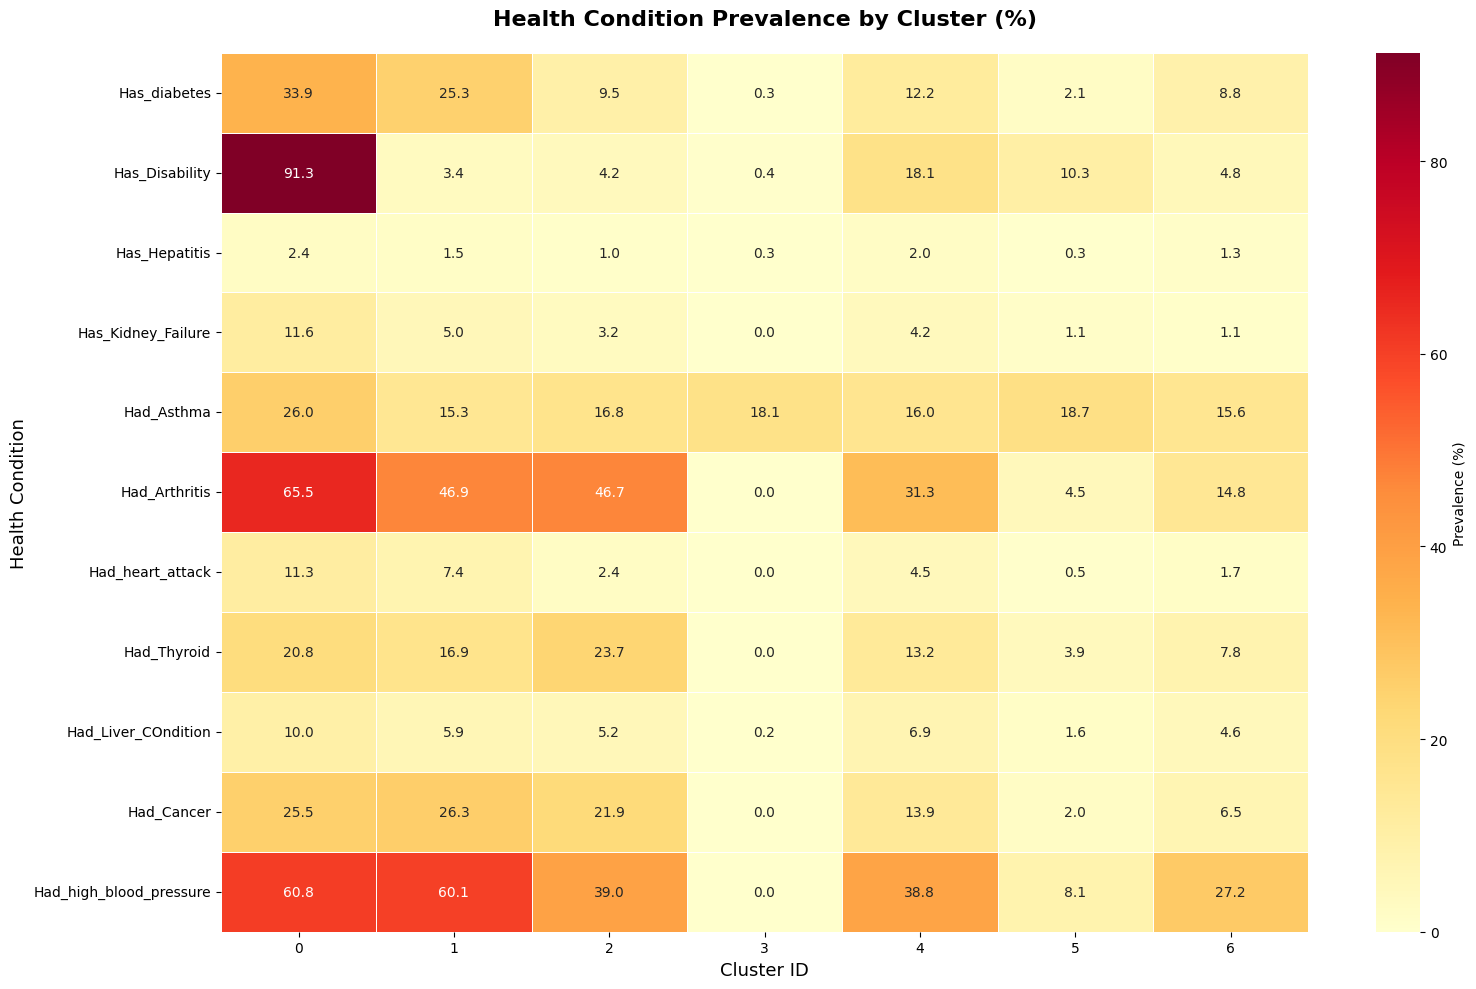

In [128]:
# ============================================================
# STEP 10: Create Visualization - Health Condition Heatmap
# ============================================================
print("\n" + "="*70)
print("CREATING VISUALIZATIONS")
print("="*70)

# Health condition heatmap
plt.figure(figsize=(16, 10))
health_matrix = health_prevalence_df.set_index('Cluster').drop(columns=['Size'])
sns.heatmap(health_matrix.T, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Prevalence (%)'}, linewidths=0.5)
plt.title('Health Condition Prevalence by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Health Condition', fontsize=13)
plt.xticks(rotation=0)
plt.tight_layout()
print("✓ Saved: cluster_health_conditions_heatmap.png")
plt.show()

✓ Saved: cluster_age_distribution.png


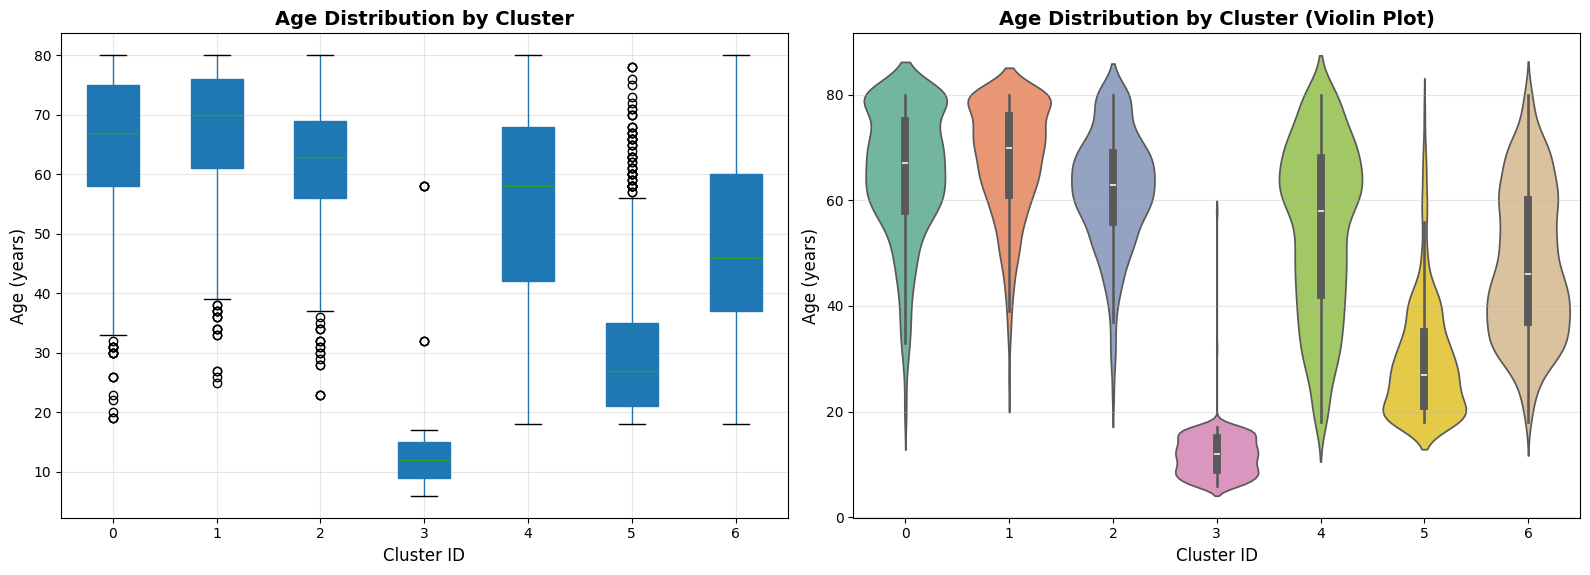

In [129]:
# ============================================================
# STEP 11: Age Distribution by Cluster
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
df.boxplot(column='Age', by='umap_clusters', ax=axes[0], patch_artist=True)
axes[0].set_title('Age Distribution by Cluster', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cluster ID', fontsize=12)
axes[0].set_ylabel('Age (years)', fontsize=12)
axes[0].get_figure().suptitle('')
axes[0].grid(True, alpha=0.3)

# Violin plot
sns.violinplot(data=df, x='umap_clusters', y='Age', ax=axes[1], palette='Set2')
axes[1].set_title('Age Distribution by Cluster (Violin Plot)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster ID', fontsize=12)
axes[1].set_ylabel('Age (years)', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')


plt.tight_layout()
print("✓ Saved: cluster_age_distribution.png")
plt.show()

✓ Saved: cluster_clinical_measurements.png


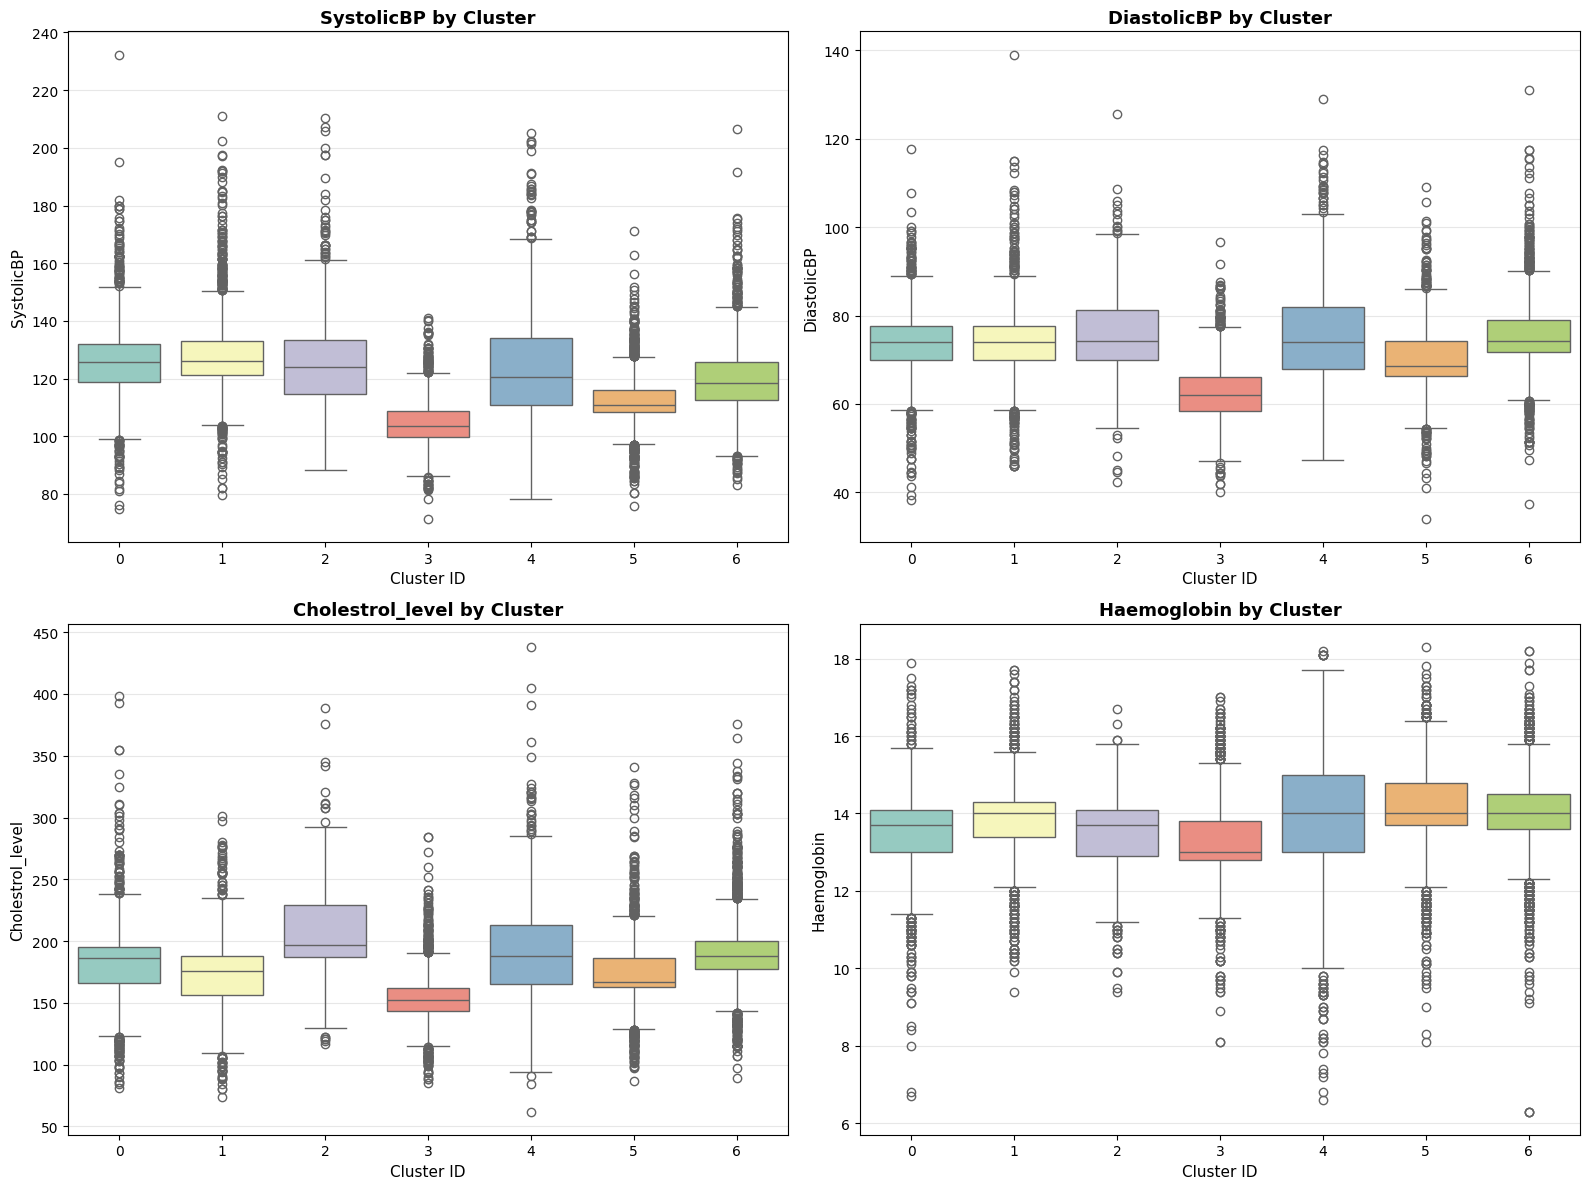

In [130]:
# ============================================================
# STEP 12: Clinical Measurements Comparison
# ============================================================
key_clinical = ['SystolicBP', 'DiastolicBP', 'Cholestrol_level', 'Haemoglobin']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, measure in enumerate(key_clinical):
    sns.boxplot(data=df, x='umap_clusters', y=measure, ax=axes[idx], palette='Set3')
    axes[idx].set_title(f'{measure} by Cluster', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Cluster ID', fontsize=11)
    axes[idx].set_ylabel(measure, fontsize=11)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Saved: cluster_clinical_measurements.png")
plt.show()

✓ Saved: cluster_gender_distribution.png


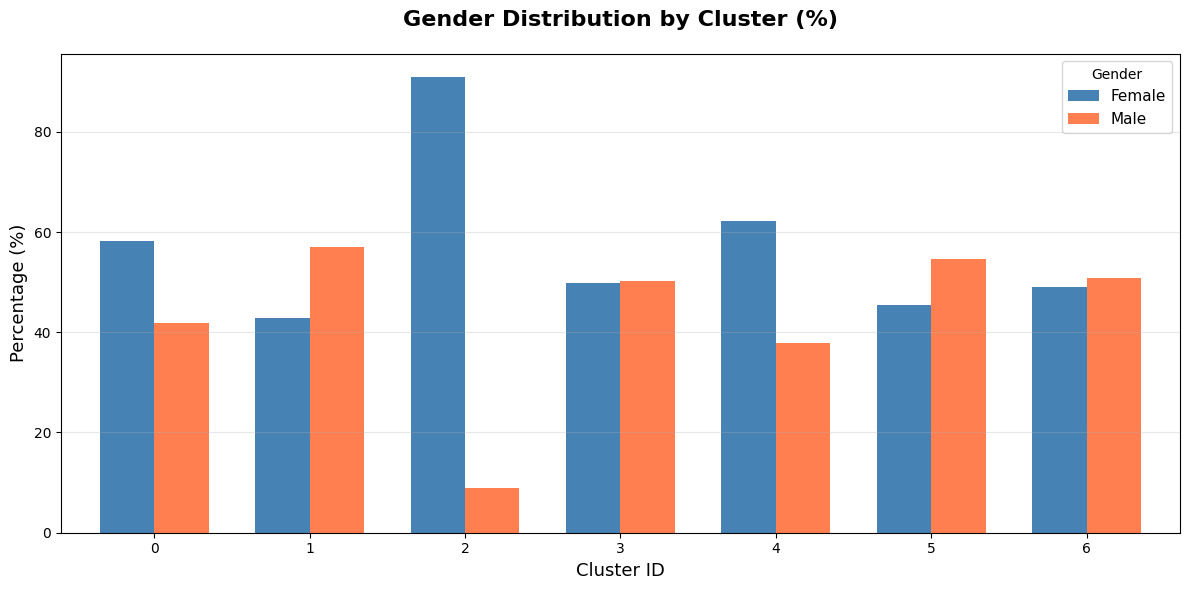

In [131]:
# ============================================================
# STEP 13: Gender Distribution by Cluster
# ============================================================
gender_cluster = pd.crosstab(df['umap_clusters'], df['Gender'], normalize='index') * 100

fig, ax = plt.subplots(figsize=(12, 6))
gender_cluster.plot(kind='bar', stacked=False, ax=ax, color=['steelblue', 'coral'], width=0.7)
plt.title('Gender Distribution by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Percentage (%)', fontsize=13)
plt.legend(title='Gender', fontsize=11)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
print("✓ Saved: cluster_gender_distribution.png")
plt.show()

✓ Saved: cluster_general_health_distribution.png


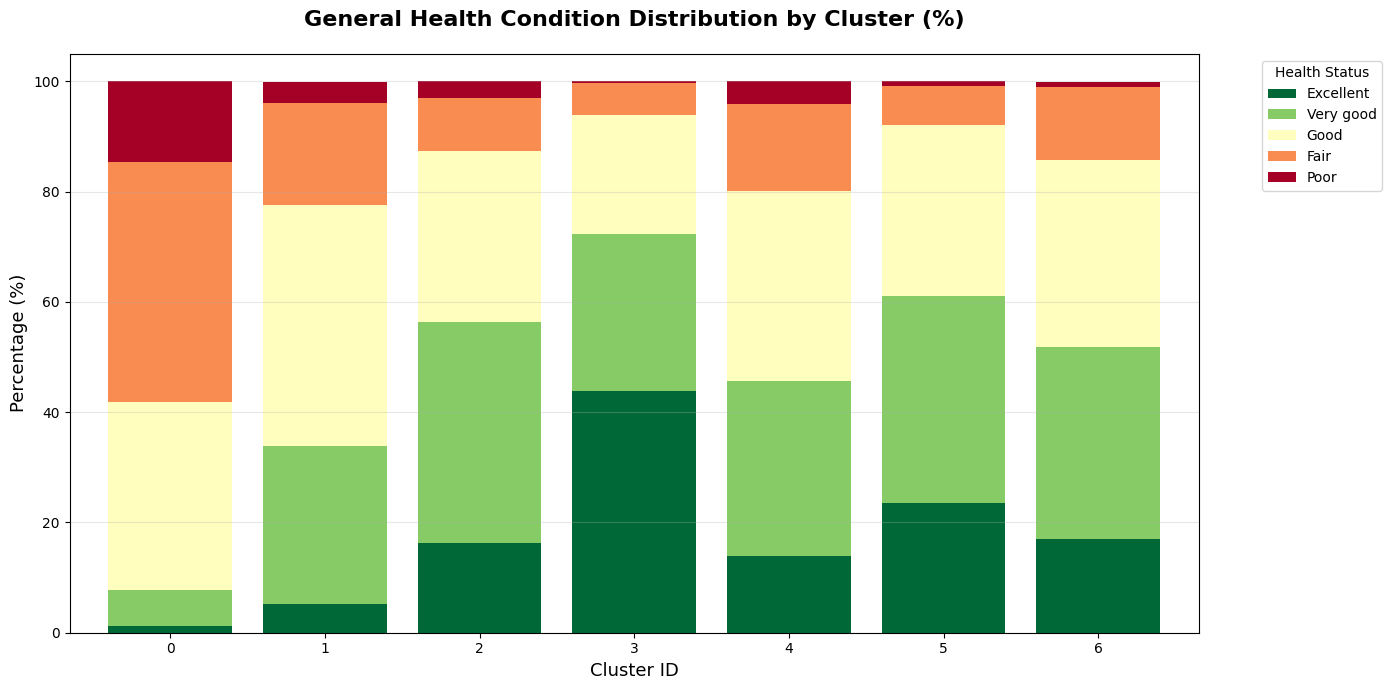

In [132]:
# ============================================================
# STEP 14: General Health Status by Cluster
# ============================================================
health_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
health_by_cluster = pd.crosstab(df['umap_clusters'], df['General_health_condition'], 
                                normalize='index') * 100

# Reorder columns
health_by_cluster = health_by_cluster.reindex(columns=[col for col in health_order if col in health_by_cluster.columns])

fig, ax = plt.subplots(figsize=(14, 7))
health_by_cluster.plot(kind='bar', stacked=True, ax=ax, 
                       colormap='RdYlGn_r', width=0.8)
plt.title('General Health Condition Distribution by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Percentage (%)', fontsize=13)
plt.legend(title='Health Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
print("✓ Saved: cluster_general_health_distribution.png")
plt.show()

✓ Saved: cluster_composite_scores.png


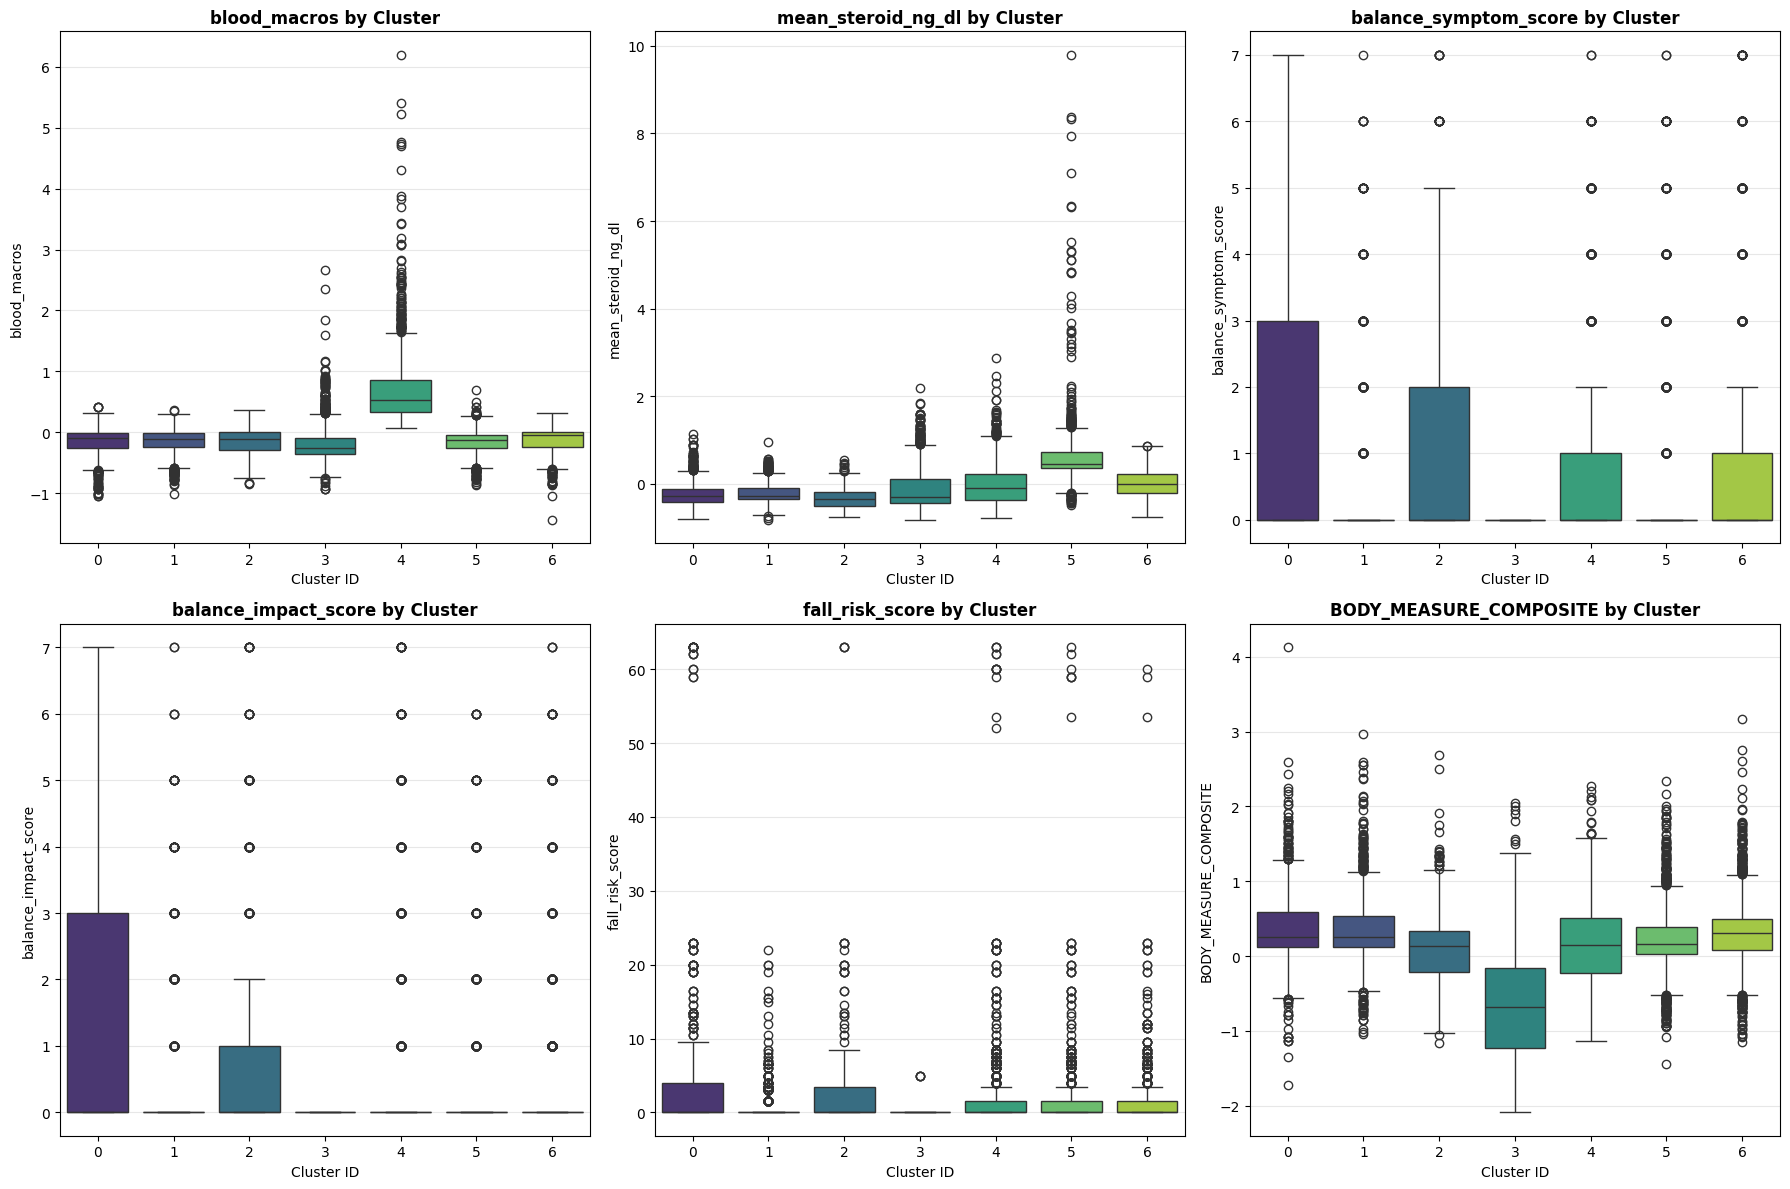

In [133]:
# ============================================================
# STEP 15: Composite Scores Comparison
# ============================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

numeric_composites = ['blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
                     'balance_impact_score', 'fall_risk_score', 'BODY_MEASURE_COMPOSITE']

for idx, score in enumerate(numeric_composites):
    if score == 'fall_risk_score':
        # Filter outliers for visualization
        plot_data = df[df[score] < 100]
    else:
        plot_data = df
    
    sns.boxplot(data=plot_data, x='umap_clusters', y=score, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'{score} by Cluster', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Cluster ID', fontsize=10)
    axes[idx].set_ylabel(score, fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Saved: cluster_composite_scores.png")
plt.show()

In [134]:
# ============================================================
# STEP 17: Create Cluster Archetypes Summary
# ============================================================
print("\n" + "="*70)
print("CLUSTER ARCHETYPES - DETAILED SUMMARY")
print("="*70)

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'#'*70}")
    print(f"CLUSTER {cluster_id} ARCHETYPE")
    print(f"{'#'*70}")
    print(f"Size: {len(cluster_data):,} patients ({len(cluster_data)/len(df)*100:.1f}%)")
    
    # Demographics
    print(f"\n📊 DEMOGRAPHICS:")
    print(f"  Average Age: {cluster_data['Age'].mean():.0f} years")
    gender_dist = cluster_data['Gender'].value_counts()
    male_pct = (gender_dist.get('Male', 0) / len(cluster_data)) * 100
    print(f"  Gender: {male_pct:.0f}% Male, {100-male_pct:.0f}% Female")
    
    # Top health conditions
    print(f"\n🏥 TOP HEALTH CONDITIONS (>20% prevalence):")
    has_conditions = False
    for condition in health_conditions:
        yes_count = (cluster_data[condition] == 'Yes').sum()
        prev = (yes_count / len(cluster_data)) * 100
        if prev > 20:
            print(f"  - {condition.replace('_', ' ')}: {prev:.1f}%")
            has_conditions = True
    if not has_conditions:
        print(f"  - No major health conditions >20% prevalence")
    
    # Clinical highlights
    print(f"\n💉 CLINICAL HIGHLIGHTS:")
    print(f"  Blood Pressure: {cluster_data['SystolicBP'].mean():.0f}/{cluster_data['DiastolicBP'].mean():.0f} mmHg")
    print(f"  Cholesterol: {cluster_data['Cholestrol_level'].mean():.0f} mg/dL")
    print(f"  Hemoglobin: {cluster_data['Haemoglobin'].mean():.1f} g/dL")
    
    # Socioeconomic
    income_clean = cluster_data['Income_to_Poverty_Ratio']
    income_clean = income_clean[(income_clean > 0) & (income_clean <= 5)]
    if len(income_clean) > 0:
        income_ratio = income_clean.mean()
        if income_ratio < 1.3:
            ses_label = "Below Poverty Line"
        elif income_ratio < 2.0:
            ses_label = "Low SES"
        elif income_ratio < 3.0:
            ses_label = "Middle SES"
        else:
            ses_label = "High SES"
        print(f"\n💰 SOCIOECONOMIC STATUS:")
        print(f"  Income/Poverty Ratio: {income_ratio:.2f} ({ses_label})")
        insurance_pct = (cluster_data['Covered_by_health_insurance'] == 'Yes').sum() / len(cluster_data) * 100
        print(f"  Health Insurance: {insurance_pct:.0f}%")
    
    # General health
    print(f"\n🌟 GENERAL HEALTH STATUS:")
    health_dist = cluster_data['General_health_condition'].value_counts().head(3)
    for status, count in health_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  - {status}: {pct:.0f}%")
    
    print(f"\n{'-'*70}")


CLUSTER ARCHETYPES - DETAILED SUMMARY

######################################################################
CLUSTER 0 ARCHETYPE
######################################################################
Size: 1,063 patients (11.3%)

📊 DEMOGRAPHICS:
  Average Age: 65 years
  Gender: 42% Male, 58% Female

🏥 TOP HEALTH CONDITIONS (>20% prevalence):
  - Has diabetes: 33.9%
  - Has Disability: 91.3%
  - Had Asthma: 26.0%
  - Had Arthritis: 65.5%
  - Had Thyroid: 20.8%
  - Had Cancer: 25.5%
  - Had high blood pressure: 60.8%

💉 CLINICAL HIGHLIGHTS:
  Blood Pressure: 127/73 mmHg
  Cholesterol: 181 mg/dL
  Hemoglobin: 13.5 g/dL

💰 SOCIOECONOMIC STATUS:
  Income/Poverty Ratio: 2.15 (Middle SES)
  Health Insurance: 92%

🌟 GENERAL HEALTH STATUS:
  - Fair: 43%
  - Good: 34%
  - Poor: 15%

----------------------------------------------------------------------

######################################################################
CLUSTER 1 ARCHETYPE
##################################################

# Cluster 0 – Low-burden symptomatic group with minimal chronic disease

This cluster shows low prevalence of hypertension, diabetes, and major organ disease, with blood pressure and lipids largely in the normal range. Symptoms and functional difficulties are present but generally mild, and fall risk is modest. Clinically, this looks like a group with limited chronic pathology and relatively preserved physiological reserve.

# Cluster 1 – Early cardio-metabolic risk with preserved function

Patients in this cluster have elevated rates of hypertension and diabetes and moderately higher blood pressure and cholesterol than the low-risk cluster. Despite this cardio-metabolic burden, functional limitations and fall risk scores remain relatively low. It represents a group with established risk factors but no major loss of independence yet.

# Cluster 2 – Musculoskeletal and respiratory morbidity with metabolic risk

This cluster combines moderate hypertension and diabetes with the highest average total cholesterol among groups. There is a notable burden of arthritis and asthma, indicating both musculoskeletal and respiratory morbidity. Functional difficulties are more common than in the lowest-risk clusters, but severe disability and falls are not dominant.

# Cluster 3 – Very low chronic disease and excellent cardio-metabolic profile

Here, hypertension, diabetes, and major organ diseases are rare, with low blood pressure and favorable lipid values. Disability, balance problems, and fall-risk scores are minimal. This cluster represents a clinically very healthy group with little evidence of chronic systemic disease.

# Cluster 4 – Multi-system chronic disease with moderate disability and fall risk

This group shows substantial hypertension and diabetes, alongside high rates of arthritis, thyroid disease, cancer history, and some kidney and cardiac disease. Functional limitations and disability are clearly more frequent, and balance and fall-risk scores are elevated. Overall, it reflects multi-morbid chronic illness with noticeable impact on daily functioning and safety.

# Cluster 6 – Complex multi-morbid cluster with largely maintained independence

Hypertension and diabetes are highly prevalent here, accompanied by very high rates of arthritis, cancer, thyroid disease, and prior myocardial infarction. Despite this heavy multi-system disease burden, recorded disability remains relatively low, and most patients report only mild to moderate functional difficulties. This suggests clinically complex patients who are still managing to maintain a fair degree of independence.

# Cluster 7 – Frail, highly disabled multi-morbid high-risk cluster

This cluster has the highest burden of hypertension, diabetes, kidney failure, arthritis, asthma, cancer, liver disease, and prior myocardial infarction. Disability is extremely common, with most individuals reporting severe functional difficulty, along with the highest balance impairment and fall-risk scores. Clinically, this is a frailty cluster with advanced multi-system disease and markedly reduced functional capacity.